from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Turag/Python/DL Lab/Multivariate/pHA')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten,Dropout, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from functions_learning import *
from feed_data import data_extract
from tensorflow import keras
from keras import layers

## Data Format

In [5]:
data = pd.read_csv("data/LocationC.csv")
data = data.drop(columns=["Unnamed: 0", "Date"])
data.head()

,TempC,pHC,ECC,DOC,BODC,TNC
0,21.30,7.91,1577,2.60,27.88,1.26
1,21.04,7.99,1648,2.75,27.51,1.18
2,21.16,8.12,1580,2.72,27.46,1.20
3,21.27,7.94,1579,2.73,27.20,1.12
4,20.51,8.00,1643,2.70,26.76,1.12


In [6]:
target_column = "pHC"
features = data.drop(target_column, axis=1)
target = data[target_column]

In [7]:
X = []
y = []
for i in range(3, len(features)):
    X.append(features.iloc[i-3:i, :].values.ravel())  # Flatten features
    y.append(target.iloc[i])

X = np.array(X)
y = np.array(y)

In [8]:
X[0], y[0]

(array([2.130e+01, 1.577e+03, 2.600e+00, 2.788e+01, 1.260e+00, 2.104e+01,
        1.648e+03, 2.750e+00, 2.751e+01, 1.180e+00, 2.116e+01, 1.580e+03,
        2.720e+00, 2.746e+01, 1.200e+00]),
 7.94)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [10]:
xt = x_train.copy()
xt = xt.reshape(231,15,1)
xt.shape

(231, 15, 1)

In [11]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=xt)
target = y_train[window_size - 1:].flatten()

In [12]:
moving_avg_data.shape, target.shape

((229, 15, 1), (229,))

In [13]:
epochs = 50

# General Model

### CNN

In [14]:
x_train = xt.copy()

2024-03-15 05:34:49.834915: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-15 05:34:49.841257: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-15 05:34:49.845713: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2024-03-15 05:34:49.912598: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 51269.9258 - root_mean_squared_error: 226.4286 

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 9s 793ms/step - loss: 51269.9258 - root_mean_squared_error: 226.4286 - val_loss: 22401.5000 - val_root_mean_squared_error: 149.6713
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 22288.3457 - root_mean_squared_error: 149.2928

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 718ms/step - loss: 12380.3906 - root_mean_squared_error: 111.2672 - val_loss: 2842.3196 - val_root_mean_squared_error: 53.3134
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 1260.7843 - root_mean_squared_error: 35.5075

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 472ms/step - loss: 1057.6283 - root_mean_squared_error: 32.5212 - val_loss: 36.1696 - val_root_mean_squared_error: 6.0141
Epoch 4/50
8/8 [==============================] - 0s 46ms/step - loss: 348.2749 - root_mean_squared_error: 18.6621 - val_loss: 920.6705 - val_root_mean_squared_error: 30.3426
Epoch 5/50
8/8 [==============================] - 0s 41ms/step - loss: 942.2332 - root_mean_squared_error: 30.6958 - val_loss: 780.6541 - val_root_mean_squared_error: 27.9402
Epoch 6/50
8/8 [==============================] - 0s 40ms/step - loss: 498.8247 - root_mean_squared_error: 22.3344 - val_loss: 169.7606 - val_root_mean_squared_error: 13.0292
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 70.8930 - root_mean_squared_error: 8.4198  

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 373ms/step - loss: 60.5612 - root_mean_squared_error: 7.7821 - val_loss: 11.8387 - val_root_mean_squared_error: 3.4407
Epoch 8/50
8/8 [==============================] - 0s 35ms/step - loss: 33.3197 - root_mean_squared_error: 5.7723 - val_loss: 53.5021 - val_root_mean_squared_error: 7.3145
Epoch 9/50
8/8 [==============================] - 0s 38ms/step - loss: 53.9971 - root_mean_squared_error: 7.3483 - val_loss: 31.0962 - val_root_mean_squared_error: 5.5764
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 25.0428 - root_mean_squared_error: 5.0043

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 651ms/step - loss: 22.6174 - root_mean_squared_error: 4.7558 - val_loss: 10.5791 - val_root_mean_squared_error: 3.2526
Epoch 11/50
8/8 [==============================] - 0s 54ms/step - loss: 10.3657 - root_mean_squared_error: 3.2196 - val_loss: 14.3513 - val_root_mean_squared_error: 3.7883
Epoch 12/50
8/8 [==============================] - 0s 47ms/step - loss: 12.3799 - root_mean_squared_error: 3.5185 - val_loss: 14.0023 - val_root_mean_squared_error: 3.7420
Epoch 13/50
8/8 [==============================] - 0s 39ms/step - loss: 10.8848 - root_mean_squared_error: 3.2992 - val_loss: 11.1401 - val_root_mean_squared_error: 3.3377
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 9.9467 - root_mean_squared_error: 3.1538

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 557ms/step - loss: 9.7273 - root_mean_squared_error: 3.1189 - val_loss: 10.4364 - val_root_mean_squared_error: 3.2305
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 9.9250 - root_mean_squared_error: 3.1504

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 422ms/step - loss: 9.9250 - root_mean_squared_error: 3.1504 - val_loss: 10.3926 - val_root_mean_squared_error: 3.2238
Epoch 16/50
8/8 [==============================] - 0s 21ms/step - loss: 9.7727 - root_mean_squared_error: 3.1261 - val_loss: 10.5362 - val_root_mean_squared_error: 3.2460
Epoch 17/50
8/8 [==============================] - 0s 22ms/step - loss: 9.6949 - root_mean_squared_error: 3.1137 - val_loss: 10.8985 - val_root_mean_squared_error: 3.3013
Epoch 18/50
8/8 [==============================] - 0s 21ms/step - loss: 9.7704 - root_mean_squared_error: 3.1258 - val_loss: 10.8061 - val_root_mean_squared_error: 3.2873
Epoch 19/50
8/8 [==============================] - 0s 19ms/step - loss: 9.6684 - root_mean_squared_error: 3.1094 - val_loss: 10.4752 - val_root_mean_squared_error: 3.2365
Epoch 20/50
8/8 [==============================] - 0s 20ms/step - loss: 9.6413 - root_mean_squared_error: 3.1050 - val_loss: 10.5726 - val_root_mean_squared

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 378ms/step - loss: 9.5409 - root_mean_squared_error: 3.0888 - val_loss: 10.2962 - val_root_mean_squared_error: 3.2088
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 8.4631 - root_mean_squared_error: 2.9091

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 470ms/step - loss: 9.5256 - root_mean_squared_error: 3.0864 - val_loss: 10.2549 - val_root_mean_squared_error: 3.2023
Epoch 29/50
8/8 [==============================] - 0s 28ms/step - loss: 9.4794 - root_mean_squared_error: 3.0789 - val_loss: 10.3319 - val_root_mean_squared_error: 3.2143
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 9.4601 - root_mean_squared_error: 3.0757

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 387ms/step - loss: 9.4601 - root_mean_squared_error: 3.0757 - val_loss: 10.2432 - val_root_mean_squared_error: 3.2005
Epoch 31/50
8/8 [==============================] - 0s 24ms/step - loss: 9.4108 - root_mean_squared_error: 3.0677 - val_loss: 10.3535 - val_root_mean_squared_error: 3.2177
Epoch 32/50
8/8 [==============================] - 0s 36ms/step - loss: 9.4557 - root_mean_squared_error: 3.0750 - val_loss: 10.4674 - val_root_mean_squared_error: 3.2353
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 9.4294 - root_mean_squared_error: 3.0707

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 514ms/step - loss: 9.4294 - root_mean_squared_error: 3.0707 - val_loss: 10.1643 - val_root_mean_squared_error: 3.1881
Epoch 34/50
8/8 [==============================] - 0s 36ms/step - loss: 9.3944 - root_mean_squared_error: 3.0650 - val_loss: 10.1695 - val_root_mean_squared_error: 3.1890
Epoch 35/50
8/8 [==============================] - 0s 34ms/step - loss: 9.3135 - root_mean_squared_error: 3.0518 - val_loss: 10.3280 - val_root_mean_squared_error: 3.2137
Epoch 36/50
8/8 [==============================] - 0s 18ms/step - loss: 9.4090 - root_mean_squared_error: 3.0674 - val_loss: 10.6574 - val_root_mean_squared_error: 3.2646
Epoch 37/50
8/8 [==============================] - 0s 21ms/step - loss: 9.3412 - root_mean_squared_error: 3.0563 - val_loss: 10.1917 - val_root_mean_squared_error: 3.1924
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 9.9566 - root_mean_squared_error: 3.1554

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 441ms/step - loss: 9.2698 - root_mean_squared_error: 3.0446 - val_loss: 9.9654 - val_root_mean_squared_error: 3.1568
Epoch 39/50
8/8 [==============================] - 0s 27ms/step - loss: 9.3680 - root_mean_squared_error: 3.0607 - val_loss: 10.0112 - val_root_mean_squared_error: 3.1640
Epoch 40/50
8/8 [==============================] - 0s 29ms/step - loss: 9.3323 - root_mean_squared_error: 3.0549 - val_loss: 10.5483 - val_root_mean_squared_error: 3.2478
Epoch 41/50
8/8 [==============================] - 0s 30ms/step - loss: 9.2216 - root_mean_squared_error: 3.0367 - val_loss: 10.0528 - val_root_mean_squared_error: 3.1706
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 7.8839 - root_mean_squared_error: 2.8078

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 364ms/step - loss: 9.3242 - root_mean_squared_error: 3.0536 - val_loss: 9.8449 - val_root_mean_squared_error: 3.1377
Epoch 43/50
8/8 [==============================] - 0s 22ms/step - loss: 9.2740 - root_mean_squared_error: 3.0453 - val_loss: 9.9846 - val_root_mean_squared_error: 3.1598
Epoch 44/50
8/8 [==============================] - 0s 28ms/step - loss: 9.1468 - root_mean_squared_error: 3.0244 - val_loss: 9.9519 - val_root_mean_squared_error: 3.1547
Epoch 45/50
8/8 [==============================] - 0s 37ms/step - loss: 9.1588 - root_mean_squared_error: 3.0264 - val_loss: 9.9666 - val_root_mean_squared_error: 3.1570
Epoch 46/50
8/8 [==============================] - 0s 37ms/step - loss: 9.1074 - root_mean_squared_error: 3.0178 - val_loss: 10.2060 - val_root_mean_squared_error: 3.1947
Epoch 47/50
8/8 [==============================] - 0s 36ms/step - loss: 9.1570 - root_mean_squared_error: 3.0261 - val_loss: 9.9033 - val_root_mean_squared_erro

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 3ms/step


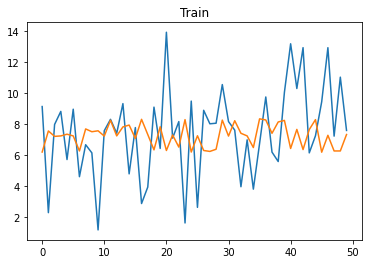

2/2 [==============================] - 0s 3ms/step


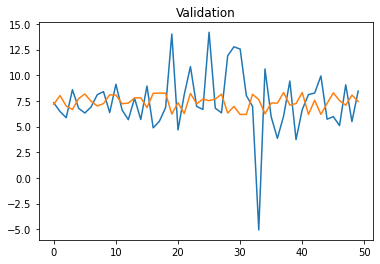

3/3 [==============================] - 0s 3ms/step


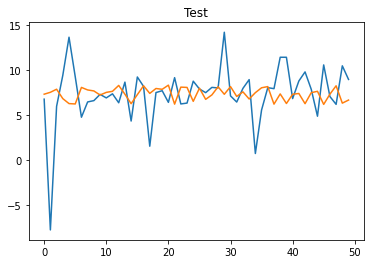

3/3 [==============================] - 0s 13ms/step


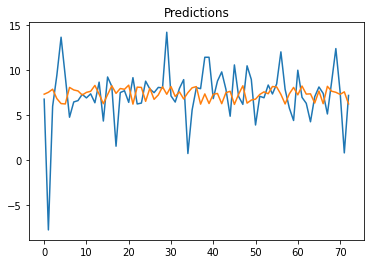

In [15]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))



cp = ModelCheckpoint('cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
cnn_mse = plot_predictions1(model,x_test, y_test)

### GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 61.4305 - root_mean_squared_error: 7.8378

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 32s 3s/step - loss: 61.4305 - root_mean_squared_error: 7.8378 - val_loss: 58.5821 - val_root_mean_squared_error: 7.6539
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 58.0571 - root_mean_squared_error: 7.6195

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 58.0571 - root_mean_squared_error: 7.6195 - val_loss: 55.2983 - val_root_mean_squared_error: 7.4363
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 54.7958 - root_mean_squared_error: 7.4024

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 26s 4s/step - loss: 54.7958 - root_mean_squared_error: 7.4024 - val_loss: 52.1300 - val_root_mean_squared_error: 7.2201
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 51.6411 - root_mean_squared_error: 7.1862

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 15s 2s/step - loss: 51.6411 - root_mean_squared_error: 7.1862 - val_loss: 49.0634 - val_root_mean_squared_error: 7.0045
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 48.4320 - root_mean_squared_error: 6.9593

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 15s 2s/step - loss: 48.5761 - root_mean_squared_error: 6.9697 - val_loss: 46.0635 - val_root_mean_squared_error: 6.7870
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 45.8990 - root_mean_squared_error: 6.7749

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 45.5867 - root_mean_squared_error: 6.7518 - val_loss: 43.1549 - val_root_mean_squared_error: 6.5692
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 42.5959 - root_mean_squared_error: 6.5266

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 42.7016 - root_mean_squared_error: 6.5346 - val_loss: 40.3912 - val_root_mean_squared_error: 6.3554
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 39.9595 - root_mean_squared_error: 6.3213

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 39.9550 - root_mean_squared_error: 6.3210 - val_loss: 37.7180 - val_root_mean_squared_error: 6.1415
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 37.4165 - root_mean_squared_error: 6.1169

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 29s 4s/step - loss: 37.2944 - root_mean_squared_error: 6.1069 - val_loss: 35.1103 - val_root_mean_squared_error: 5.9254
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 35.1165 - root_mean_squared_error: 5.9259

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 34.6506 - root_mean_squared_error: 5.8865 - val_loss: 32.3680 - val_root_mean_squared_error: 5.6893
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 31.9292 - root_mean_squared_error: 5.6506

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 31.8370 - root_mean_squared_error: 5.6424 - val_loss: 29.7450 - val_root_mean_squared_error: 5.4539
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 29.3595 - root_mean_squared_error: 5.4184

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 29.3595 - root_mean_squared_error: 5.4184 - val_loss: 27.4285 - val_root_mean_squared_error: 5.2372
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 27.1464 - root_mean_squared_error: 5.2102

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 25s 4s/step - loss: 27.0620 - root_mean_squared_error: 5.2021 - val_loss: 25.1973 - val_root_mean_squared_error: 5.0197
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 24.8534 - root_mean_squared_error: 4.9853

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 24.8399 - root_mean_squared_error: 4.9840 - val_loss: 23.0661 - val_root_mean_squared_error: 4.8027
Epoch 15/50
5/8 [=================>............] - ETA: 0s - loss: 22.9940 - root_mean_squared_error: 4.7952

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 22.7286 - root_mean_squared_error: 4.7675 - val_loss: 21.0356 - val_root_mean_squared_error: 4.5865
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 20.6925 - root_mean_squared_error: 4.5489

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 20.7162 - root_mean_squared_error: 4.5515 - val_loss: 19.1151 - val_root_mean_squared_error: 4.3721
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 18.8208 - root_mean_squared_error: 4.3383

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 18.8208 - root_mean_squared_error: 4.3383 - val_loss: 17.2977 - val_root_mean_squared_error: 4.1591
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 17.0364 - root_mean_squared_error: 4.1275

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 17.0250 - root_mean_squared_error: 4.1261 - val_loss: 15.5915 - val_root_mean_squared_error: 3.9486
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 15.3568 - root_mean_squared_error: 3.9188

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 15.3388 - root_mean_squared_error: 3.9165 - val_loss: 13.9868 - val_root_mean_squared_error: 3.7399
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 13.9424 - root_mean_squared_error: 3.7340

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 26s 4s/step - loss: 13.7439 - root_mean_squared_error: 3.7073 - val_loss: 12.4443 - val_root_mean_squared_error: 3.5276
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 12.2263 - root_mean_squared_error: 3.4966

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 12.2263 - root_mean_squared_error: 3.4966 - val_loss: 11.0482 - val_root_mean_squared_error: 3.3239
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 10.8496 - root_mean_squared_error: 3.2939

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 10.8708 - root_mean_squared_error: 3.2971 - val_loss: 9.7885 - val_root_mean_squared_error: 3.1287
Epoch 23/50
5/8 [=================>............] - ETA: 0s - loss: 9.6303 - root_mean_squared_error: 3.1033

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 28s 4s/step - loss: 9.6331 - root_mean_squared_error: 3.1037 - val_loss: 8.6403 - val_root_mean_squared_error: 2.9394
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 8.5701 - root_mean_squared_error: 2.9275

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 8.5149 - root_mean_squared_error: 2.9180 - val_loss: 7.6010 - val_root_mean_squared_error: 2.7570
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 7.4951 - root_mean_squared_error: 2.7377

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 7.4951 - root_mean_squared_error: 2.7377 - val_loss: 6.6685 - val_root_mean_squared_error: 2.5824
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 6.6392 - root_mean_squared_error: 2.5767

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 26s 4s/step - loss: 6.5823 - root_mean_squared_error: 2.5656 - val_loss: 5.8286 - val_root_mean_squared_error: 2.4143
Epoch 27/50
5/8 [=================>............] - ETA: 0s - loss: 5.9379 - root_mean_squared_error: 2.4368

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 5.7654 - root_mean_squared_error: 2.4011 - val_loss: 5.0827 - val_root_mean_squared_error: 2.2545
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 5.0183 - root_mean_squared_error: 2.2402

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 5.0323 - root_mean_squared_error: 2.2433 - val_loss: 4.4194 - val_root_mean_squared_error: 2.1022
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 4.3870 - root_mean_squared_error: 2.0945

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 4.3870 - root_mean_squared_error: 2.0945 - val_loss: 3.8293 - val_root_mean_squared_error: 1.9569
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 3.8108 - root_mean_squared_error: 1.9521

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 28s 4s/step - loss: 3.8108 - root_mean_squared_error: 1.9521 - val_loss: 3.3106 - val_root_mean_squared_error: 1.8195
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 3.3317 - root_mean_squared_error: 1.8253

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 3.2989 - root_mean_squared_error: 1.8163 - val_loss: 2.8564 - val_root_mean_squared_error: 1.6901
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 2.8650 - root_mean_squared_error: 1.6926

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2.8571 - root_mean_squared_error: 1.6903 - val_loss: 2.4740 - val_root_mean_squared_error: 1.5729
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 2.4977 - root_mean_squared_error: 1.5804

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2.4846 - root_mean_squared_error: 1.5763 - val_loss: 2.1456 - val_root_mean_squared_error: 1.4648
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 2.1483 - root_mean_squared_error: 1.4657

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2.1616 - root_mean_squared_error: 1.4702 - val_loss: 1.8639 - val_root_mean_squared_error: 1.3652
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 1.8943 - root_mean_squared_error: 1.3764

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 1.8822 - root_mean_squared_error: 1.3719 - val_loss: 1.6192 - val_root_mean_squared_error: 1.2725
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 1.6426 - root_mean_squared_error: 1.2816

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 27s 4s/step - loss: 1.6426 - root_mean_squared_error: 1.2816 - val_loss: 1.4069 - val_root_mean_squared_error: 1.1861
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 1.4280 - root_mean_squared_error: 1.1950

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 16s 2s/step - loss: 1.4318 - root_mean_squared_error: 1.1966 - val_loss: 1.2328 - val_root_mean_squared_error: 1.1103
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 1.2582 - root_mean_squared_error: 1.1217

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 1.2582 - root_mean_squared_error: 1.1217 - val_loss: 1.0906 - val_root_mean_squared_error: 1.0443
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 1.1161 - root_mean_squared_error: 1.0564

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 1.1161 - root_mean_squared_error: 1.0564 - val_loss: 0.9676 - val_root_mean_squared_error: 0.9837
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 1.0728 - root_mean_squared_error: 1.0357

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 33s 5s/step - loss: 0.9949 - root_mean_squared_error: 0.9974 - val_loss: 0.8643 - val_root_mean_squared_error: 0.9297
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 0.9055 - root_mean_squared_error: 0.9516

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 0.8918 - root_mean_squared_error: 0.9444 - val_loss: 0.7817 - val_root_mean_squared_error: 0.8841
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 0.7898 - root_mean_squared_error: 0.8887

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 0.8052 - root_mean_squared_error: 0.8973 - val_loss: 0.7147 - val_root_mean_squared_error: 0.8454
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 0.7123 - root_mean_squared_error: 0.8440

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 27s 4s/step - loss: 0.7360 - root_mean_squared_error: 0.8579 - val_loss: 0.6550 - val_root_mean_squared_error: 0.8093
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 0.6884 - root_mean_squared_error: 0.8297

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 25s 4s/step - loss: 0.6749 - root_mean_squared_error: 0.8215 - val_loss: 0.6048 - val_root_mean_squared_error: 0.7777
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 0.6227 - root_mean_squared_error: 0.7891

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 0.6227 - root_mean_squared_error: 0.7891 - val_loss: 0.5675 - val_root_mean_squared_error: 0.7533
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 0.5822 - root_mean_squared_error: 0.7630

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 28s 4s/step - loss: 0.5822 - root_mean_squared_error: 0.7630 - val_loss: 0.5351 - val_root_mean_squared_error: 0.7315
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 0.5465 - root_mean_squared_error: 0.7393

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 0.5465 - root_mean_squared_error: 0.7393 - val_loss: 0.5078 - val_root_mean_squared_error: 0.7126
Epoch 48/50
5/8 [=================>............] - ETA: 0s - loss: 0.5302 - root_mean_squared_error: 0.7281

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 0.5183 - root_mean_squared_error: 0.7199 - val_loss: 0.4848 - val_root_mean_squared_error: 0.6963
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 0.4921 - root_mean_squared_error: 0.7015

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 0.4921 - root_mean_squared_error: 0.7015 - val_loss: 0.4664 - val_root_mean_squared_error: 0.6829
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 0.4678 - root_mean_squared_error: 0.6840

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 2s 20ms/step


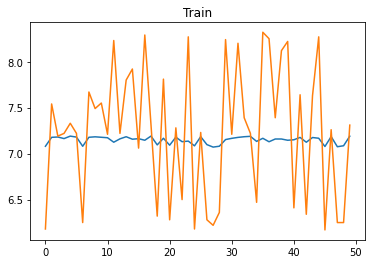

2/2 [==============================] - 2s 7ms/step


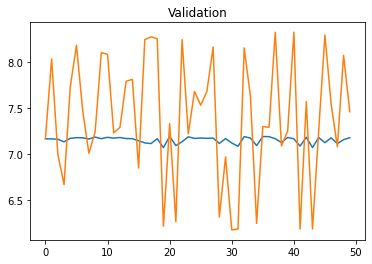

3/3 [==============================] - 0s 28ms/step


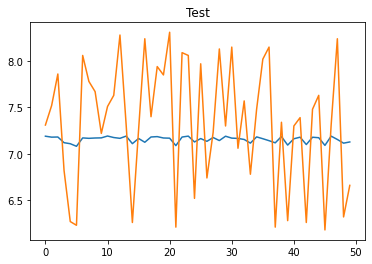

3/3 [==============================] - 0s 5ms/step


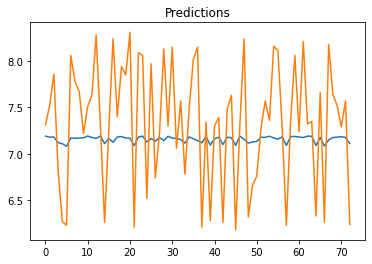

In [16]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
gru_mse = plot_predictions1(model,x_test, y_test)

### LSTM

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 51.9478 - root_mean_squared_error: 7.2075

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 49s 5s/step - loss: 52.1018 - root_mean_squared_error: 7.2182 - val_loss: 50.7579 - val_root_mean_squared_error: 7.1245
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 51.4522 - root_mean_squared_error: 7.1730

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 51.2504 - root_mean_squared_error: 7.1589 - val_loss: 49.9120 - val_root_mean_squared_error: 7.0648
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 50.2150 - root_mean_squared_error: 7.0863

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 50.3782 - root_mean_squared_error: 7.0978 - val_loss: 49.0281 - val_root_mean_squared_error: 7.0020
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 49.4676 - root_mean_squared_error: 7.0333

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 49.4676 - root_mean_squared_error: 7.0333 - val_loss: 48.1219 - val_root_mean_squared_error: 6.9370
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 48.4915 - root_mean_squared_error: 6.9636

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 48.5707 - root_mean_squared_error: 6.9693 - val_loss: 47.2806 - val_root_mean_squared_error: 6.8761
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 47.7745 - root_mean_squared_error: 6.9119

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 47.7745 - root_mean_squared_error: 6.9119 - val_loss: 46.6004 - val_root_mean_squared_error: 6.8264
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 47.1355 - root_mean_squared_error: 6.8655

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 47.1355 - root_mean_squared_error: 6.8655 - val_loss: 45.9631 - val_root_mean_squared_error: 6.7796
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 46.5302 - root_mean_squared_error: 6.8213

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 46.5302 - root_mean_squared_error: 6.8213 - val_loss: 45.4011 - val_root_mean_squared_error: 6.7380
Epoch 9/50
5/8 [=================>............] - ETA: 0s - loss: 45.7119 - root_mean_squared_error: 6.7611

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 45.9622 - root_mean_squared_error: 6.7795 - val_loss: 44.8535 - val_root_mean_squared_error: 6.6973
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 45.4263 - root_mean_squared_error: 6.7399

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 45.4136 - root_mean_squared_error: 6.7390 - val_loss: 44.3078 - val_root_mean_squared_error: 6.6564
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 44.6527 - root_mean_squared_error: 6.6823

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 44.8610 - root_mean_squared_error: 6.6978 - val_loss: 43.7506 - val_root_mean_squared_error: 6.6144
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 44.2912 - root_mean_squared_error: 6.6552

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 44.2912 - root_mean_squared_error: 6.6552 - val_loss: 43.1700 - val_root_mean_squared_error: 6.5704
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 43.7114 - root_mean_squared_error: 6.6115

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 43.6833 - root_mean_squared_error: 6.6093 - val_loss: 42.5436 - val_root_mean_squared_error: 6.5225
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 43.0589 - root_mean_squared_error: 6.5619

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 43.0589 - root_mean_squared_error: 6.5619 - val_loss: 41.9446 - val_root_mean_squared_error: 6.4765
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 42.3699 - root_mean_squared_error: 6.5092

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 42.4660 - root_mean_squared_error: 6.5166 - val_loss: 41.3711 - val_root_mean_squared_error: 6.4320
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 41.8906 - root_mean_squared_error: 6.4723

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 41.8906 - root_mean_squared_error: 6.4723 - val_loss: 40.7985 - val_root_mean_squared_error: 6.3874
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 41.1059 - root_mean_squared_error: 6.4114

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 41.3089 - root_mean_squared_error: 6.4272 - val_loss: 40.2189 - val_root_mean_squared_error: 6.3418
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 40.5930 - root_mean_squared_error: 6.3713

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 40.6506 - root_mean_squared_error: 6.3758 - val_loss: 39.2894 - val_root_mean_squared_error: 6.2681
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 39.2837 - root_mean_squared_error: 6.2677

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 39.2015 - root_mean_squared_error: 6.2611 - val_loss: 37.2076 - val_root_mean_squared_error: 6.0998
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 36.9116 - root_mean_squared_error: 6.0755

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 36.9452 - root_mean_squared_error: 6.0783 - val_loss: 34.9109 - val_root_mean_squared_error: 5.9085
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 34.6588 - root_mean_squared_error: 5.8872

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 34.6588 - root_mean_squared_error: 5.8872 - val_loss: 32.7426 - val_root_mean_squared_error: 5.7221
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 32.5271 - root_mean_squared_error: 5.7032

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 32.5271 - root_mean_squared_error: 5.7032 - val_loss: 30.7132 - val_root_mean_squared_error: 5.5419
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 30.5236 - root_mean_squared_error: 5.5248

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 30.5236 - root_mean_squared_error: 5.5248 - val_loss: 28.7692 - val_root_mean_squared_error: 5.3637
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 28.4969 - root_mean_squared_error: 5.3382

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 28.5603 - root_mean_squared_error: 5.3442 - val_loss: 26.8517 - val_root_mean_squared_error: 5.1819
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 27.0028 - root_mean_squared_error: 5.1964

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 26.6706 - root_mean_squared_error: 5.1644 - val_loss: 25.0587 - val_root_mean_squared_error: 5.0059
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 24.9189 - root_mean_squared_error: 4.9919

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 24.8626 - root_mean_squared_error: 4.9862 - val_loss: 23.2712 - val_root_mean_squared_error: 4.8240
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 23.2251 - root_mean_squared_error: 4.8192

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 23.0373 - root_mean_squared_error: 4.7997 - val_loss: 21.4719 - val_root_mean_squared_error: 4.6338
Epoch 28/50
5/8 [=================>............] - ETA: 0s - loss: 21.4498 - root_mean_squared_error: 4.6314

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 21.2522 - root_mean_squared_error: 4.6100 - val_loss: 19.7819 - val_root_mean_squared_error: 4.4477
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 19.5242 - root_mean_squared_error: 4.4186

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 19.5916 - root_mean_squared_error: 4.4262 - val_loss: 18.2301 - val_root_mean_squared_error: 4.2697
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 18.0115 - root_mean_squared_error: 4.2440

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 18.0115 - root_mean_squared_error: 4.2440 - val_loss: 16.6305 - val_root_mean_squared_error: 4.0780
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 16.6835 - root_mean_squared_error: 4.0845

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 16.4393 - root_mean_squared_error: 4.0545 - val_loss: 15.2095 - val_root_mean_squared_error: 3.8999
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 15.0552 - root_mean_squared_error: 3.8801

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 15.0496 - root_mean_squared_error: 3.8794 - val_loss: 13.8972 - val_root_mean_squared_error: 3.7279
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 13.7357 - root_mean_squared_error: 3.7062

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 13.7357 - root_mean_squared_error: 3.7062 - val_loss: 12.6367 - val_root_mean_squared_error: 3.5548
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 12.5051 - root_mean_squared_error: 3.5362

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 12.4823 - root_mean_squared_error: 3.5330 - val_loss: 11.4499 - val_root_mean_squared_error: 3.3838
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 11.3049 - root_mean_squared_error: 3.3623

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 11.2964 - root_mean_squared_error: 3.3610 - val_loss: 10.3354 - val_root_mean_squared_error: 3.2149
Epoch 36/50
5/8 [=================>............] - ETA: 0s - loss: 10.4027 - root_mean_squared_error: 3.2253

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 10.1909 - root_mean_squared_error: 3.1923 - val_loss: 9.2846 - val_root_mean_squared_error: 3.0471
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 9.1441 - root_mean_squared_error: 3.0239

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 9.1441 - root_mean_squared_error: 3.0239 - val_loss: 8.3015 - val_root_mean_squared_error: 2.8812
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 8.1667 - root_mean_squared_error: 2.8577

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 8.1667 - root_mean_squared_error: 2.8577 - val_loss: 7.3891 - val_root_mean_squared_error: 2.7183
Epoch 39/50
5/8 [=================>............] - ETA: 0s - loss: 7.4507 - root_mean_squared_error: 2.7296

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 7.2685 - root_mean_squared_error: 2.6960 - val_loss: 6.5534 - val_root_mean_squared_error: 2.5600
Epoch 40/50
5/8 [=================>............] - ETA: 0s - loss: 6.6500 - root_mean_squared_error: 2.5788

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 6.4514 - root_mean_squared_error: 2.5400 - val_loss: 5.7956 - val_root_mean_squared_error: 2.4074
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 5.7260 - root_mean_squared_error: 2.3929

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 5.7110 - root_mean_squared_error: 2.3898 - val_loss: 5.1170 - val_root_mean_squared_error: 2.2621
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 5.1173 - root_mean_squared_error: 2.2621

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 5.0410 - root_mean_squared_error: 2.2452 - val_loss: 4.5078 - val_root_mean_squared_error: 2.1232
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 4.4402 - root_mean_squared_error: 2.1072

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 4.4402 - root_mean_squared_error: 2.1072 - val_loss: 3.9627 - val_root_mean_squared_error: 1.9907
Epoch 44/50
5/8 [=================>............] - ETA: 0s - loss: 3.9301 - root_mean_squared_error: 1.9824

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 3.9060 - root_mean_squared_error: 1.9764 - val_loss: 3.4649 - val_root_mean_squared_error: 1.8614
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 3.4003 - root_mean_squared_error: 1.8440

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 3.4143 - root_mean_squared_error: 1.8478 - val_loss: 3.0114 - val_root_mean_squared_error: 1.7353
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 3.0787 - root_mean_squared_error: 1.7546

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2.9651 - root_mean_squared_error: 1.7220 - val_loss: 2.5966 - val_root_mean_squared_error: 1.6114
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 2.5628 - root_mean_squared_error: 1.6009

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2.5431 - root_mean_squared_error: 1.5947 - val_loss: 2.2032 - val_root_mean_squared_error: 1.4843
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2.1394 - root_mean_squared_error: 1.4627

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2.1394 - root_mean_squared_error: 1.4627 - val_loss: 1.8321 - val_root_mean_squared_error: 1.3536
Epoch 49/50
6/8 [=====================>........] - ETA: 0s - loss: 1.8431 - root_mean_squared_error: 1.3576

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 1.7969 - root_mean_squared_error: 1.3405 - val_loss: 1.5456 - val_root_mean_squared_error: 1.2432
Epoch 50/50
5/8 [=================>............] - ETA: 0s - loss: 1.5394 - root_mean_squared_error: 1.2407

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 3s 17ms/step


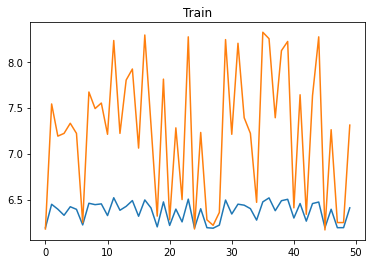

2/2 [==============================] - 3s 5ms/step


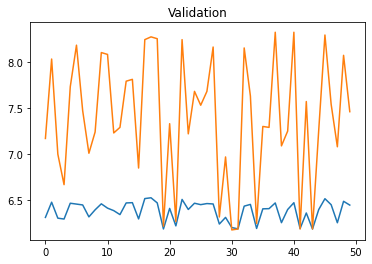

3/3 [==============================] - 0s 19ms/step


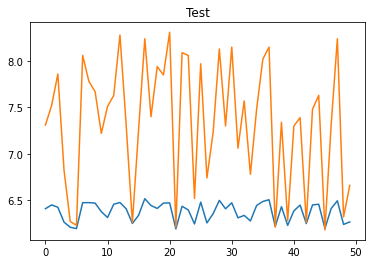

3/3 [==============================] - 0s 27ms/step


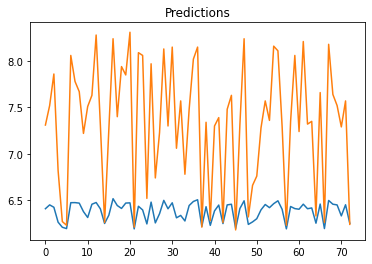

In [17]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
lstm_mse = plot_predictions1(model,x_test, y_test)

### RNN

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 47.7705 - root_mean_squared_error: 6.9116 INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 47.3224 - root_mean_squared_error: 6.8791 - val_loss: 44.2518 - val_root_mean_squared_error: 6.6522
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 43.2921 - root_mean_squared_error: 6.5797INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 43.2921 - root_mean_squared_error: 6.5797 - val_loss: 40.3998 - val_root_mean_squared_error: 6.3561
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 40.1020 - root_mean_squared_error: 6.3326INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 39.5272 - root_mean_squared_error: 6.2871 - val_loss: 36.8103 - val_root_mean_squared_error: 6.0671
Epoch 4/50
5/8 [=================>............] - ETA: 0s - loss: 36.4755 - root_mean_squared_error: 6.0395INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 36.0155 - root_mean_squared_error: 6.0013 - val_loss: 33.4827 - val_root_mean_squared_error: 5.7864
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 32.9288 - root_mean_squared_error: 5.7384INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 32.7673 - root_mean_squared_error: 5.7243 - val_loss: 30.3998 - val_root_mean_squared_error: 5.5136
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 29.7544 - root_mean_squared_error: 5.4548INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 29.7544 - root_mean_squared_error: 5.4548 - val_loss: 27.5587 - val_root_mean_squared_error: 5.2496
Epoch 7/50
5/8 [=================>............] - ETA: 0s - loss: 27.5816 - root_mean_squared_error: 5.2518INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 26.9849 - root_mean_squared_error: 5.1947 - val_loss: 24.9246 - val_root_mean_squared_error: 4.9925
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 24.4000 - root_mean_squared_error: 4.9396INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 24.4000 - root_mean_squared_error: 4.9396 - val_loss: 22.4868 - val_root_mean_squared_error: 4.7420
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 22.0351 - root_mean_squared_error: 4.6942INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 22.0066 - root_mean_squared_error: 4.6911 - val_loss: 20.2263 - val_root_mean_squared_error: 4.4974
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 19.9365 - root_mean_squared_error: 4.4650INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 19.8021 - root_mean_squared_error: 4.4500 - val_loss: 18.1433 - val_root_mean_squared_error: 4.2595
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 17.7834 - root_mean_squared_error: 4.2170INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 17.7579 - root_mean_squared_error: 4.2140 - val_loss: 16.2412 - val_root_mean_squared_error: 4.0300
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 15.9271 - root_mean_squared_error: 3.9909INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 15.8980 - root_mean_squared_error: 3.9872 - val_loss: 14.4912 - val_root_mean_squared_error: 3.8067
Epoch 13/50
2/8 [======>.......................] - ETA: 0s - loss: 15.1533 - root_mean_squared_error: 3.8927INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 14.1897 - root_mean_squared_error: 3.7669 - val_loss: 12.8929 - val_root_mean_squared_error: 3.5907
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 12.6293 - root_mean_squared_error: 3.5538INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 12.6293 - root_mean_squared_error: 3.5538 - val_loss: 11.4426 - val_root_mean_squared_error: 3.3827
Epoch 15/50
5/8 [=================>............] - ETA: 0s - loss: 11.0254 - root_mean_squared_error: 3.3205INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 11.2041 - root_mean_squared_error: 3.3473 - val_loss: 10.1347 - val_root_mean_squared_error: 3.1835
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 9.9335 - root_mean_squared_error: 3.1517INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 868ms/step - loss: 9.9282 - root_mean_squared_error: 3.1509 - val_loss: 8.9597 - val_root_mean_squared_error: 2.9933
Epoch 17/50
1/8 [==>...........................] - ETA: 0s - loss: 8.5762 - root_mean_squared_error: 2.9285INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 690ms/step - loss: 8.7829 - root_mean_squared_error: 2.9636 - val_loss: 7.9024 - val_root_mean_squared_error: 2.8111
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 7.7911 - root_mean_squared_error: 2.7912INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 848ms/step - loss: 7.7511 - root_mean_squared_error: 2.7841 - val_loss: 6.9520 - val_root_mean_squared_error: 2.6367
Epoch 19/50
5/8 [=================>............] - ETA: 0s - loss: 6.9083 - root_mean_squared_error: 2.6284INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 6.8240 - root_mean_squared_error: 2.6123 - val_loss: 6.1040 - val_root_mean_squared_error: 2.4706
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 6.0178 - root_mean_squared_error: 2.4531INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 5.9947 - root_mean_squared_error: 2.4484 - val_loss: 5.3469 - val_root_mean_squared_error: 2.3123
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 5.1777 - root_mean_squared_error: 2.2755INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 5.2546 - root_mean_squared_error: 2.2923 - val_loss: 4.6745 - val_root_mean_squared_error: 2.1621
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 4.5713 - root_mean_squared_error: 2.1381INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 4.5976 - root_mean_squared_error: 2.1442 - val_loss: 4.0728 - val_root_mean_squared_error: 2.0181
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 4.0494 - root_mean_squared_error: 2.0123INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 4.0066 - root_mean_squared_error: 2.0017 - val_loss: 3.5350 - val_root_mean_squared_error: 1.8802
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 3.8448 - root_mean_squared_error: 1.9608INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 3.4804 - root_mean_squared_error: 1.8656 - val_loss: 3.0605 - val_root_mean_squared_error: 1.7494
Epoch 25/50
5/8 [=================>............] - ETA: 0s - loss: 3.1612 - root_mean_squared_error: 1.7780INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 3.0151 - root_mean_squared_error: 1.7364 - val_loss: 2.6406 - val_root_mean_squared_error: 1.6250
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 2.6234 - root_mean_squared_error: 1.6197INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2.5987 - root_mean_squared_error: 1.6120 - val_loss: 2.2683 - val_root_mean_squared_error: 1.5061
Epoch 27/50
5/8 [=================>............] - ETA: 0s - loss: 2.3079 - root_mean_squared_error: 1.5192INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2.2307 - root_mean_squared_error: 1.4936 - val_loss: 1.9364 - val_root_mean_squared_error: 1.3915
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 1.9106 - root_mean_squared_error: 1.3823INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 1.9042 - root_mean_squared_error: 1.3799 - val_loss: 1.6498 - val_root_mean_squared_error: 1.2844
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 1.6195 - root_mean_squared_error: 1.2726INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1.6195 - root_mean_squared_error: 1.2726 - val_loss: 1.3994 - val_root_mean_squared_error: 1.1829
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 1.4270 - root_mean_squared_error: 1.1946INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1.3750 - root_mean_squared_error: 1.1726 - val_loss: 1.1820 - val_root_mean_squared_error: 1.0872
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 1.1709 - root_mean_squared_error: 1.0821INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 1.1618 - root_mean_squared_error: 1.0779 - val_loss: 0.9963 - val_root_mean_squared_error: 0.9982
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 0.9792 - root_mean_squared_error: 0.9895INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 0.9792 - root_mean_squared_error: 0.9895 - val_loss: 0.8407 - val_root_mean_squared_error: 0.9169
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 0.8268 - root_mean_squared_error: 0.9093INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 0.8268 - root_mean_squared_error: 0.9093 - val_loss: 0.7097 - val_root_mean_squared_error: 0.8425
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 0.7019 - root_mean_squared_error: 0.8378INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.6996 - root_mean_squared_error: 0.8364 - val_loss: 0.6066 - val_root_mean_squared_error: 0.7788
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 0.5985 - root_mean_squared_error: 0.7737INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.5982 - root_mean_squared_error: 0.7735 - val_loss: 0.5243 - val_root_mean_squared_error: 0.7241
Epoch 36/50
5/8 [=================>............] - ETA: 0s - loss: 0.5291 - root_mean_squared_error: 0.7274INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 0.5175 - root_mean_squared_error: 0.7194 - val_loss: 0.4580 - val_root_mean_squared_error: 0.6767
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 0.4909 - root_mean_squared_error: 0.7007INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 0.4518 - root_mean_squared_error: 0.6722 - val_loss: 0.4065 - val_root_mean_squared_error: 0.6376
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 0.4342 - root_mean_squared_error: 0.6589INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 0.4024 - root_mean_squared_error: 0.6343 - val_loss: 0.3666 - val_root_mean_squared_error: 0.6054
Epoch 39/50
5/8 [=================>............] - ETA: 0s - loss: 0.3937 - root_mean_squared_error: 0.6274INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.3621 - root_mean_squared_error: 0.6017 - val_loss: 0.3365 - val_root_mean_squared_error: 0.5801
Epoch 40/50
5/8 [=================>............] - ETA: 0s - loss: 0.3221 - root_mean_squared_error: 0.5675INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 0.3317 - root_mean_squared_error: 0.5759 - val_loss: 0.3135 - val_root_mean_squared_error: 0.5599
Epoch 41/50
5/8 [=================>............] - ETA: 0s - loss: 0.3206 - root_mean_squared_error: 0.5662INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.3080 - root_mean_squared_error: 0.5550 - val_loss: 0.2964 - val_root_mean_squared_error: 0.5444
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 0.2876 - root_mean_squared_error: 0.5363INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 884ms/step - loss: 0.2899 - root_mean_squared_error: 0.5385 - val_loss: 0.2839 - val_root_mean_squared_error: 0.5328
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 0.2702 - root_mean_squared_error: 0.5198INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 0.2772 - root_mean_squared_error: 0.5265 - val_loss: 0.2745 - val_root_mean_squared_error: 0.5239
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 0.2662 - root_mean_squared_error: 0.5159INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.2665 - root_mean_squared_error: 0.5163 - val_loss: 0.2674 - val_root_mean_squared_error: 0.5171
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 0.2588 - root_mean_squared_error: 0.5087INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 0.2588 - root_mean_squared_error: 0.5087 - val_loss: 0.2618 - val_root_mean_squared_error: 0.5117
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 0.2436 - root_mean_squared_error: 0.4936INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.2521 - root_mean_squared_error: 0.5021 - val_loss: 0.2580 - val_root_mean_squared_error: 0.5079
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 0.2420 - root_mean_squared_error: 0.4919INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.2473 - root_mean_squared_error: 0.4973 - val_loss: 0.2549 - val_root_mean_squared_error: 0.5049
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 0.2473 - root_mean_squared_error: 0.4973INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.2437 - root_mean_squared_error: 0.4937 - val_loss: 0.2523 - val_root_mean_squared_error: 0.5023
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 0.2367 - root_mean_squared_error: 0.4865INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.2402 - root_mean_squared_error: 0.4901 - val_loss: 0.2504 - val_root_mean_squared_error: 0.5004
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 0.2377 - root_mean_squared_error: 0.4875INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 2s 6ms/step


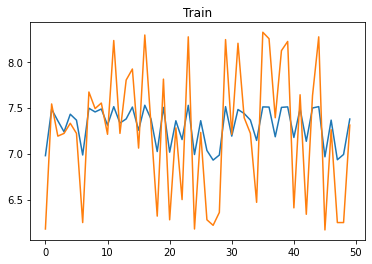

2/2 [==============================] - 1s 9ms/step


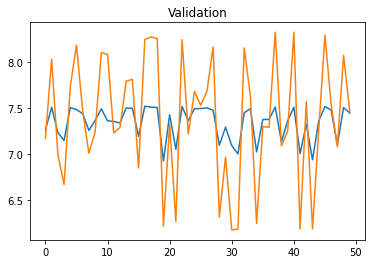

3/3 [==============================] - 0s 33ms/step


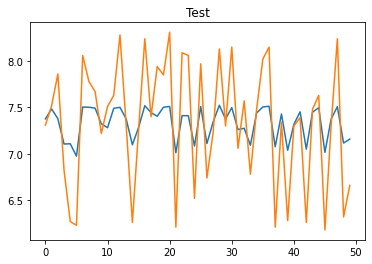

3/3 [==============================] - 0s 5ms/step


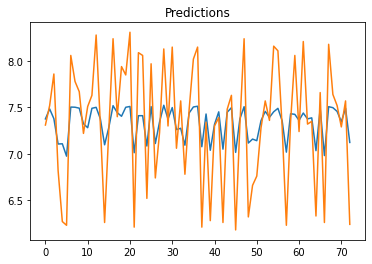

In [18]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
rnn_mse = plot_predictions1(model,x_test, y_test)

# Moving Average

In [19]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=x_train)
target = y_train[window_size - 1:].flatten()

#### CNN

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 1325.8918 - root_mean_squared_error: 36.4128 

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 433ms/step - loss: 1312.1287 - root_mean_squared_error: 36.2233 - val_loss: 884.4388 - val_root_mean_squared_error: 29.7395
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 602.9443 - root_mean_squared_error: 24.5549

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 432ms/step - loss: 590.1793 - root_mean_squared_error: 24.2936 - val_loss: 22.3441 - val_root_mean_squared_error: 4.7270
Epoch 3/50
8/8 [==============================] - 0s 31ms/step - loss: 176.8415 - root_mean_squared_error: 13.2982 - val_loss: 150.3410 - val_root_mean_squared_error: 12.2614
Epoch 4/50
8/8 [==============================] - 0s 34ms/step - loss: 47.8970 - root_mean_squared_error: 6.9208 - val_loss: 95.4475 - val_root_mean_squared_error: 9.7697
Epoch 5/50
8/8 [==============================] - 0s 47ms/step - loss: 51.4198 - root_mean_squared_error: 7.1708 - val_loss: 27.1840 - val_root_mean_squared_error: 5.2138
Epoch 6/50
5/8 [=================>............] - ETA: 0s - loss: 27.3456 - root_mean_squared_error: 5.2293

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 646ms/step - loss: 24.7899 - root_mean_squared_error: 4.9789 - val_loss: 15.2792 - val_root_mean_squared_error: 3.9089
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 10.8378 - root_mean_squared_error: 3.2921

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 680ms/step - loss: 10.8176 - root_mean_squared_error: 3.2890 - val_loss: 15.2182 - val_root_mean_squared_error: 3.9010
Epoch 8/50
8/8 [==============================] - 1s 114ms/step - loss: 8.4129 - root_mean_squared_error: 2.9005 - val_loss: 18.4065 - val_root_mean_squared_error: 4.2903
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 7.7151 - root_mean_squared_error: 2.7776

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 619ms/step - loss: 7.7151 - root_mean_squared_error: 2.7776 - val_loss: 13.6507 - val_root_mean_squared_error: 3.6947
Epoch 10/50
8/8 [==============================] - 0s 25ms/step - loss: 7.0268 - root_mean_squared_error: 2.6508 - val_loss: 14.4316 - val_root_mean_squared_error: 3.7989
Epoch 11/50
1/8 [==>...........................] - ETA: 0s - loss: 6.9555 - root_mean_squared_error: 2.6373

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 407ms/step - loss: 6.5466 - root_mean_squared_error: 2.5586 - val_loss: 13.3613 - val_root_mean_squared_error: 3.6553
Epoch 12/50
8/8 [==============================] - 0s 27ms/step - loss: 6.5199 - root_mean_squared_error: 2.5534 - val_loss: 13.4636 - val_root_mean_squared_error: 3.6693
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 6.6169 - root_mean_squared_error: 2.5723

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 509ms/step - loss: 6.6169 - root_mean_squared_error: 2.5723 - val_loss: 13.1250 - val_root_mean_squared_error: 3.6228
Epoch 14/50
8/8 [==============================] - 0s 29ms/step - loss: 6.3721 - root_mean_squared_error: 2.5243 - val_loss: 13.8228 - val_root_mean_squared_error: 3.7179
Epoch 15/50
8/8 [==============================] - 0s 31ms/step - loss: 6.4032 - root_mean_squared_error: 2.5305 - val_loss: 13.4165 - val_root_mean_squared_error: 3.6628
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 6.5289 - root_mean_squared_error: 2.5552

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 542ms/step - loss: 6.4059 - root_mean_squared_error: 2.5310 - val_loss: 13.0438 - val_root_mean_squared_error: 3.6116
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 6.5511 - root_mean_squared_error: 2.5595

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 581ms/step - loss: 6.2853 - root_mean_squared_error: 2.5071 - val_loss: 12.8343 - val_root_mean_squared_error: 3.5825
Epoch 18/50
8/8 [==============================] - 0s 49ms/step - loss: 6.3753 - root_mean_squared_error: 2.5249 - val_loss: 12.8523 - val_root_mean_squared_error: 3.5850
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 6.5851 - root_mean_squared_error: 2.5661

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 631ms/step - loss: 6.1882 - root_mean_squared_error: 2.4876 - val_loss: 12.6608 - val_root_mean_squared_error: 3.5582
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 6.0933 - root_mean_squared_error: 2.4685

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 450ms/step - loss: 6.1440 - root_mean_squared_error: 2.4787 - val_loss: 12.4409 - val_root_mean_squared_error: 3.5272
Epoch 21/50
8/8 [==============================] - 0s 31ms/step - loss: 6.0480 - root_mean_squared_error: 2.4593 - val_loss: 13.1074 - val_root_mean_squared_error: 3.6204
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 6.0021 - root_mean_squared_error: 2.4499

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 6.1472 - root_mean_squared_error: 2.4794 - val_loss: 12.0670 - val_root_mean_squared_error: 3.4738
Epoch 23/50
8/8 [==============================] - 0s 49ms/step - loss: 7.3645 - root_mean_squared_error: 2.7138 - val_loss: 14.0684 - val_root_mean_squared_error: 3.7508
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 5.6307 - root_mean_squared_error: 2.3729

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 403ms/step - loss: 6.7313 - root_mean_squared_error: 2.5945 - val_loss: 11.8144 - val_root_mean_squared_error: 3.4372
Epoch 25/50
8/8 [==============================] - 0s 43ms/step - loss: 6.2237 - root_mean_squared_error: 2.4947 - val_loss: 11.8431 - val_root_mean_squared_error: 3.4414
Epoch 26/50
8/8 [==============================] - 0s 38ms/step - loss: 5.9647 - root_mean_squared_error: 2.4423 - val_loss: 12.0885 - val_root_mean_squared_error: 3.4769
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 5.8229 - root_mean_squared_error: 2.4131

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 396ms/step - loss: 5.7966 - root_mean_squared_error: 2.4076 - val_loss: 11.4963 - val_root_mean_squared_error: 3.3906
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 5.9342 - root_mean_squared_error: 2.4360

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 455ms/step - loss: 5.9246 - root_mean_squared_error: 2.4341 - val_loss: 11.4568 - val_root_mean_squared_error: 3.3848
Epoch 29/50
8/8 [==============================] - 0s 20ms/step - loss: 5.6258 - root_mean_squared_error: 2.3719 - val_loss: 11.7418 - val_root_mean_squared_error: 3.4266
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 4.2972 - root_mean_squared_error: 2.0730

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 386ms/step - loss: 5.6518 - root_mean_squared_error: 2.3774 - val_loss: 11.3404 - val_root_mean_squared_error: 3.3675
Epoch 31/50
8/8 [==============================] - 0s 29ms/step - loss: 5.5838 - root_mean_squared_error: 2.3630 - val_loss: 11.7480 - val_root_mean_squared_error: 3.4275
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 5.6397 - root_mean_squared_error: 2.3748

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 578ms/step - loss: 5.6397 - root_mean_squared_error: 2.3748 - val_loss: 10.9205 - val_root_mean_squared_error: 3.3046
Epoch 33/50
8/8 [==============================] - 0s 39ms/step - loss: 5.7846 - root_mean_squared_error: 2.4051 - val_loss: 10.9943 - val_root_mean_squared_error: 3.3158
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 5.3924 - root_mean_squared_error: 2.3222

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 319ms/step - loss: 5.4065 - root_mean_squared_error: 2.3252 - val_loss: 10.8854 - val_root_mean_squared_error: 3.2993
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 5.0942 - root_mean_squared_error: 2.2570

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 726ms/step - loss: 5.3696 - root_mean_squared_error: 2.3172 - val_loss: 10.7578 - val_root_mean_squared_error: 3.2799
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 5.2037 - root_mean_squared_error: 2.2812

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 392ms/step - loss: 5.2694 - root_mean_squared_error: 2.2955 - val_loss: 10.4571 - val_root_mean_squared_error: 3.2337
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 5.2202 - root_mean_squared_error: 2.2848

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 372ms/step - loss: 5.2397 - root_mean_squared_error: 2.2890 - val_loss: 10.2746 - val_root_mean_squared_error: 3.2054
Epoch 38/50
8/8 [==============================] - 0s 28ms/step - loss: 5.2676 - root_mean_squared_error: 2.2951 - val_loss: 11.9138 - val_root_mean_squared_error: 3.4516
Epoch 39/50
4/8 [==============>...............] - ETA: 0s - loss: 5.7541 - root_mean_squared_error: 2.3988

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 494ms/step - loss: 5.9023 - root_mean_squared_error: 2.4295 - val_loss: 10.0469 - val_root_mean_squared_error: 3.1697
Epoch 40/50
8/8 [==============================] - 0s 30ms/step - loss: 5.6639 - root_mean_squared_error: 2.3799 - val_loss: 10.0771 - val_root_mean_squared_error: 3.1744
Epoch 41/50
8/8 [==============================] - 0s 32ms/step - loss: 5.1493 - root_mean_squared_error: 2.2692 - val_loss: 10.0723 - val_root_mean_squared_error: 3.1737
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 4.6053 - root_mean_squared_error: 2.1460

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 610ms/step - loss: 4.9655 - root_mean_squared_error: 2.2283 - val_loss: 9.5712 - val_root_mean_squared_error: 3.0937
Epoch 43/50
8/8 [==============================] - 0s 39ms/step - loss: 5.0098 - root_mean_squared_error: 2.2383 - val_loss: 11.2192 - val_root_mean_squared_error: 3.3495
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 5.8905 - root_mean_squared_error: 2.4270

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 586ms/step - loss: 5.8744 - root_mean_squared_error: 2.4237 - val_loss: 9.3682 - val_root_mean_squared_error: 3.0608
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 5.0223 - root_mean_squared_error: 2.2410

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 629ms/step - loss: 5.2331 - root_mean_squared_error: 2.2876 - val_loss: 9.1976 - val_root_mean_squared_error: 3.0328
Epoch 46/50
8/8 [==============================] - 0s 57ms/step - loss: 4.9522 - root_mean_squared_error: 2.2254 - val_loss: 10.1475 - val_root_mean_squared_error: 3.1855
Epoch 47/50
5/8 [=================>............] - ETA: 0s - loss: 4.9886 - root_mean_squared_error: 2.2335

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 463ms/step - loss: 4.8962 - root_mean_squared_error: 2.2127 - val_loss: 9.1239 - val_root_mean_squared_error: 3.0206
Epoch 48/50
8/8 [==============================] - 0s 44ms/step - loss: 4.7344 - root_mean_squared_error: 2.1759 - val_loss: 9.2940 - val_root_mean_squared_error: 3.0486
Epoch 49/50
8/8 [==============================] - 0s 40ms/step - loss: 4.6661 - root_mean_squared_error: 2.1601 - val_loss: 9.1488 - val_root_mean_squared_error: 3.0247
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 4.3884 - root_mean_squared_error: 2.0949

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 6ms/step


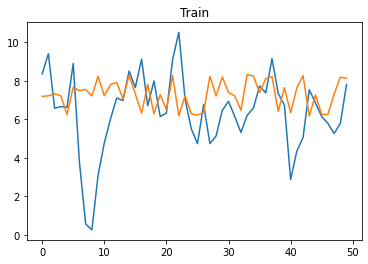

2/2 [==============================] - 1s 32ms/step


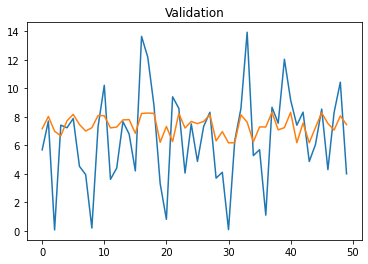

3/3 [==============================] - 0s 32ms/step


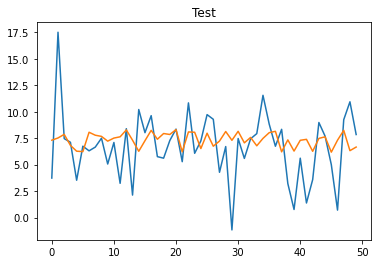

3/3 [==============================] - 0s 5ms/step


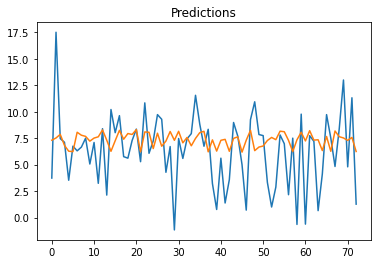

In [20]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_cnn_mse = plot_predictions1(model,x_test, y_test)

#### GRU

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 56.0059 - root_mean_squared_error: 7.4837

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 34s 3s/step - loss: 56.1435 - root_mean_squared_error: 7.4929 - val_loss: 53.3492 - val_root_mean_squared_error: 7.3041
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 52.9858 - root_mean_squared_error: 7.2791

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 52.9858 - root_mean_squared_error: 7.2791 - val_loss: 50.2051 - val_root_mean_squared_error: 7.0856
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 49.6735 - root_mean_squared_error: 7.0479

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 49.7286 - root_mean_squared_error: 7.0519 - val_loss: 46.9115 - val_root_mean_squared_error: 6.8492
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 47.1324 - root_mean_squared_error: 6.8653

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 46.5186 - root_mean_squared_error: 6.8205 - val_loss: 43.9913 - val_root_mean_squared_error: 6.6326
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 43.8733 - root_mean_squared_error: 6.6237

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 43.6537 - root_mean_squared_error: 6.6071 - val_loss: 41.2467 - val_root_mean_squared_error: 6.4224
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 40.8902 - root_mean_squared_error: 6.3945

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 40.8902 - root_mean_squared_error: 6.3945 - val_loss: 38.5596 - val_root_mean_squared_error: 6.2096
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 38.1590 - root_mean_squared_error: 6.1773

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 38.1590 - root_mean_squared_error: 6.1773 - val_loss: 35.7775 - val_root_mean_squared_error: 5.9814
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 35.2547 - root_mean_squared_error: 5.9376

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 35.2016 - root_mean_squared_error: 5.9331 - val_loss: 32.8224 - val_root_mean_squared_error: 5.7291
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 32.4155 - root_mean_squared_error: 5.6935

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 32.4155 - root_mean_squared_error: 5.6935 - val_loss: 30.3439 - val_root_mean_squared_error: 5.5085
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 29.9412 - root_mean_squared_error: 5.4719

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 29.9412 - root_mean_squared_error: 5.4719 - val_loss: 27.9263 - val_root_mean_squared_error: 5.2845
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 27.5313 - root_mean_squared_error: 5.2470

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 27.5163 - root_mean_squared_error: 5.2456 - val_loss: 25.5879 - val_root_mean_squared_error: 5.0584
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 25.1763 - root_mean_squared_error: 5.0176

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 25.1763 - root_mean_squared_error: 5.0176 - val_loss: 23.3266 - val_root_mean_squared_error: 4.8298
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 22.8406 - root_mean_squared_error: 4.7792

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 22.9087 - root_mean_squared_error: 4.7863 - val_loss: 21.1392 - val_root_mean_squared_error: 4.5977
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 20.7499 - root_mean_squared_error: 4.5552

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 20.7196 - root_mean_squared_error: 4.5519 - val_loss: 19.0391 - val_root_mean_squared_error: 4.3634
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 18.6330 - root_mean_squared_error: 4.3166

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 18.6330 - root_mean_squared_error: 4.3166 - val_loss: 17.0350 - val_root_mean_squared_error: 4.1273
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 16.6532 - root_mean_squared_error: 4.0808

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 16.6490 - root_mean_squared_error: 4.0803 - val_loss: 15.1290 - val_root_mean_squared_error: 3.8896
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 14.9266 - root_mean_squared_error: 3.8635

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 14.7611 - root_mean_squared_error: 3.8420 - val_loss: 13.3508 - val_root_mean_squared_error: 3.6539
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 13.0006 - root_mean_squared_error: 3.6056

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 13.0006 - root_mean_squared_error: 3.6056 - val_loss: 11.7019 - val_root_mean_squared_error: 3.4208
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 11.4341 - root_mean_squared_error: 3.3814

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 11.3837 - root_mean_squared_error: 3.3740 - val_loss: 10.1948 - val_root_mean_squared_error: 3.1929
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 9.9228 - root_mean_squared_error: 3.1501 

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 9.9228 - root_mean_squared_error: 3.1501 - val_loss: 8.8354 - val_root_mean_squared_error: 2.9724
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 8.5549 - root_mean_squared_error: 2.9249

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 8.5895 - root_mean_squared_error: 2.9308 - val_loss: 7.6216 - val_root_mean_squared_error: 2.7607
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 7.3821 - root_mean_squared_error: 2.7170

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 7.4055 - root_mean_squared_error: 2.7213 - val_loss: 6.5407 - val_root_mean_squared_error: 2.5575
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 6.3649 - root_mean_squared_error: 2.5229

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 6.3649 - root_mean_squared_error: 2.5229 - val_loss: 5.5906 - val_root_mean_squared_error: 2.3644
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 5.5665 - root_mean_squared_error: 2.3593

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 5.4483 - root_mean_squared_error: 2.3342 - val_loss: 4.7736 - val_root_mean_squared_error: 2.1848
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 4.6571 - root_mean_squared_error: 2.1580

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 4.6571 - root_mean_squared_error: 2.1580 - val_loss: 4.0797 - val_root_mean_squared_error: 2.0198
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 3.9882 - root_mean_squared_error: 1.9970

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 3.9882 - root_mean_squared_error: 1.9970 - val_loss: 3.4805 - val_root_mean_squared_error: 1.8656
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 3.4186 - root_mean_squared_error: 1.8489

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 3.4116 - root_mean_squared_error: 1.8471 - val_loss: 2.9696 - val_root_mean_squared_error: 1.7233
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2.9429 - root_mean_squared_error: 1.7155

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2.9216 - root_mean_squared_error: 1.7093 - val_loss: 2.5355 - val_root_mean_squared_error: 1.5923
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 2.4822 - root_mean_squared_error: 1.5755

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2.5021 - root_mean_squared_error: 1.5818 - val_loss: 2.1728 - val_root_mean_squared_error: 1.4741
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2.1184 - root_mean_squared_error: 1.4555

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2.1473 - root_mean_squared_error: 1.4654 - val_loss: 1.8624 - val_root_mean_squared_error: 1.3647
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 1.8468 - root_mean_squared_error: 1.3590

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 1.8468 - root_mean_squared_error: 1.3590 - val_loss: 1.5993 - val_root_mean_squared_error: 1.2646
Epoch 32/50
6/8 [=====================>........] - ETA: 0s - loss: 1.6425 - root_mean_squared_error: 1.2816

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 1.5949 - root_mean_squared_error: 1.2629 - val_loss: 1.3854 - val_root_mean_squared_error: 1.1770
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 1.3838 - root_mean_squared_error: 1.1763

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 1.3838 - root_mean_squared_error: 1.1763 - val_loss: 1.2096 - val_root_mean_squared_error: 1.0998
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 1.2120 - root_mean_squared_error: 1.1009

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 1.2120 - root_mean_squared_error: 1.1009 - val_loss: 1.0605 - val_root_mean_squared_error: 1.0298
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 1.0655 - root_mean_squared_error: 1.0323

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 1.0655 - root_mean_squared_error: 1.0323 - val_loss: 0.9399 - val_root_mean_squared_error: 0.9695
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 0.9487 - root_mean_squared_error: 0.9740

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 0.9484 - root_mean_squared_error: 0.9738 - val_loss: 0.8398 - val_root_mean_squared_error: 0.9164
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 0.8516 - root_mean_squared_error: 0.9228

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 0.8479 - root_mean_squared_error: 0.9208 - val_loss: 0.7586 - val_root_mean_squared_error: 0.8709
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 0.7936 - root_mean_squared_error: 0.8909

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 0.7648 - root_mean_squared_error: 0.8745 - val_loss: 0.6911 - val_root_mean_squared_error: 0.8313
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 0.6961 - root_mean_squared_error: 0.8343

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 0.6961 - root_mean_squared_error: 0.8343 - val_loss: 0.6363 - val_root_mean_squared_error: 0.7977
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 0.6685 - root_mean_squared_error: 0.8176

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 0.6408 - root_mean_squared_error: 0.8005 - val_loss: 0.5903 - val_root_mean_squared_error: 0.7683
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 0.6245 - root_mean_squared_error: 0.7903

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 0.5947 - root_mean_squared_error: 0.7712 - val_loss: 0.5515 - val_root_mean_squared_error: 0.7427
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 0.5546 - root_mean_squared_error: 0.7447

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 0.5546 - root_mean_squared_error: 0.7447 - val_loss: 0.5225 - val_root_mean_squared_error: 0.7229
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 0.5212 - root_mean_squared_error: 0.7219

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 0.5243 - root_mean_squared_error: 0.7241 - val_loss: 0.4996 - val_root_mean_squared_error: 0.7068
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 0.5081 - root_mean_squared_error: 0.7128

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 0.5000 - root_mean_squared_error: 0.7071 - val_loss: 0.4803 - val_root_mean_squared_error: 0.6930
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 0.4785 - root_mean_squared_error: 0.6917

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 0.4785 - root_mean_squared_error: 0.6917 - val_loss: 0.4649 - val_root_mean_squared_error: 0.6819
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 0.4580 - root_mean_squared_error: 0.6768

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 0.4622 - root_mean_squared_error: 0.6799 - val_loss: 0.4528 - val_root_mean_squared_error: 0.6729
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 0.4475 - root_mean_squared_error: 0.6689

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 0.4482 - root_mean_squared_error: 0.6695 - val_loss: 0.4429 - val_root_mean_squared_error: 0.6655
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 0.4378 - root_mean_squared_error: 0.6617

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 0.4378 - root_mean_squared_error: 0.6617 - val_loss: 0.4352 - val_root_mean_squared_error: 0.6597
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 0.3880 - root_mean_squared_error: 0.6229

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 0.4282 - root_mean_squared_error: 0.6543 - val_loss: 0.4294 - val_root_mean_squared_error: 0.6553
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 0.4194 - root_mean_squared_error: 0.6476

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 6s 17ms/step


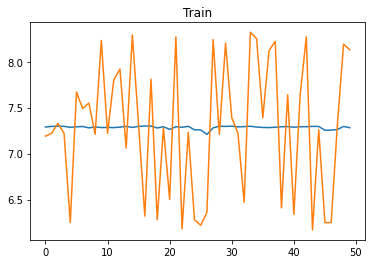

2/2 [==============================] - 3s 7ms/step


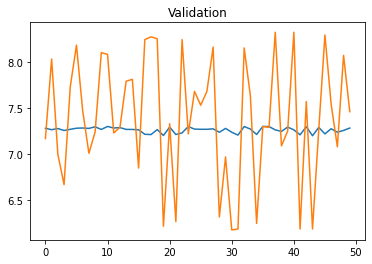

3/3 [==============================] - 3s 2s/step


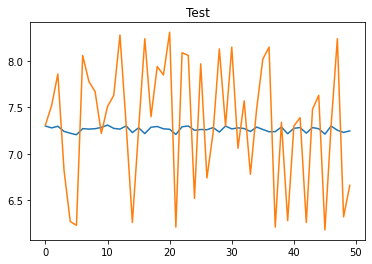

3/3 [==============================] - 0s 8ms/step


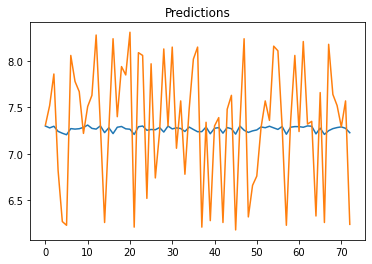

In [21]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_gru/', save_best_only=True)
model = fit_model(model, cp, epochs,  moving_avg_data, target, x_val, y_val)

plot_train("mavg_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_gru_mse = plot_predictions1(model,x_test, y_test)

#### LSTM

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 52.7273 - root_mean_squared_error: 7.2614

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 51s 5s/step - loss: 52.2208 - root_mean_squared_error: 7.2264 - val_loss: 50.4042 - val_root_mean_squared_error: 7.0996
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 50.7938 - root_mean_squared_error: 7.1270

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 3s/step - loss: 50.7938 - root_mean_squared_error: 7.1270 - val_loss: 49.1561 - val_root_mean_squared_error: 7.0111
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 49.7698 - root_mean_squared_error: 7.0548

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 49.5236 - root_mean_squared_error: 7.0373 - val_loss: 48.0268 - val_root_mean_squared_error: 6.9301
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 48.5541 - root_mean_squared_error: 6.9681

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 48.6117 - root_mean_squared_error: 6.9722 - val_loss: 47.3740 - val_root_mean_squared_error: 6.8829
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 47.9767 - root_mean_squared_error: 6.9265

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 47.9767 - root_mean_squared_error: 6.9265 - val_loss: 46.7263 - val_root_mean_squared_error: 6.8357
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 47.5070 - root_mean_squared_error: 6.8925

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 47.3085 - root_mean_squared_error: 6.8781 - val_loss: 46.0541 - val_root_mean_squared_error: 6.7863
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 46.6747 - root_mean_squared_error: 6.8319

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 46.6205 - root_mean_squared_error: 6.8279 - val_loss: 45.3611 - val_root_mean_squared_error: 6.7351
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 45.6449 - root_mean_squared_error: 6.7561

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 45.9077 - root_mean_squared_error: 6.7755 - val_loss: 44.6326 - val_root_mean_squared_error: 6.6808
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 45.3116 - root_mean_squared_error: 6.7314

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 45.1543 - root_mean_squared_error: 6.7197 - val_loss: 43.8634 - val_root_mean_squared_error: 6.6229
Epoch 10/50
5/8 [=================>............] - ETA: 0s - loss: 45.4204 - root_mean_squared_error: 6.7395

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 44.3719 - root_mean_squared_error: 6.6612 - val_loss: 43.0883 - val_root_mean_squared_error: 6.5642
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 43.6894 - root_mean_squared_error: 6.6098

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 43.5877 - root_mean_squared_error: 6.6021 - val_loss: 42.3154 - val_root_mean_squared_error: 6.5050
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 42.7724 - root_mean_squared_error: 6.5401

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 42.7955 - root_mean_squared_error: 6.5418 - val_loss: 41.5153 - val_root_mean_squared_error: 6.4432
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 41.9720 - root_mean_squared_error: 6.4786

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 41.9720 - root_mean_squared_error: 6.4786 - val_loss: 40.6711 - val_root_mean_squared_error: 6.3774
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 41.0673 - root_mean_squared_error: 6.4084

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 41.0889 - root_mean_squared_error: 6.4101 - val_loss: 39.7229 - val_root_mean_squared_error: 6.3026
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 40.0614 - root_mean_squared_error: 6.3294

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 40.0614 - root_mean_squared_error: 6.3294 - val_loss: 38.6302 - val_root_mean_squared_error: 6.2153
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 39.1899 - root_mean_squared_error: 6.2602

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 38.9618 - root_mean_squared_error: 6.2419 - val_loss: 37.5708 - val_root_mean_squared_error: 6.1295
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 37.8386 - root_mean_squared_error: 6.1513

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 37.8871 - root_mean_squared_error: 6.1552 - val_loss: 36.5062 - val_root_mean_squared_error: 6.0420
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 36.7996 - root_mean_squared_error: 6.0663

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 36.7996 - root_mean_squared_error: 6.0663 - val_loss: 35.4216 - val_root_mean_squared_error: 5.9516
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 35.6886 - root_mean_squared_error: 5.9740

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 35.6886 - root_mean_squared_error: 5.9740 - val_loss: 34.3128 - val_root_mean_squared_error: 5.8577
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 34.5510 - root_mean_squared_error: 5.8780

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 34.5510 - root_mean_squared_error: 5.8780 - val_loss: 33.1594 - val_root_mean_squared_error: 5.7584
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 33.3470 - root_mean_squared_error: 5.7747

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 33.3560 - root_mean_squared_error: 5.7755 - val_loss: 31.9464 - val_root_mean_squared_error: 5.6521
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 32.1430 - root_mean_squared_error: 5.6695

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 32.1329 - root_mean_squared_error: 5.6686 - val_loss: 30.7600 - val_root_mean_squared_error: 5.5462
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 30.8666 - root_mean_squared_error: 5.5558

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 30.9279 - root_mean_squared_error: 5.5613 - val_loss: 29.5680 - val_root_mean_squared_error: 5.4376
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 29.6967 - root_mean_squared_error: 5.4495

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 29.6967 - root_mean_squared_error: 5.4495 - val_loss: 28.2797 - val_root_mean_squared_error: 5.3179
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 28.3292 - root_mean_squared_error: 5.3225

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 28.3292 - root_mean_squared_error: 5.3225 - val_loss: 26.9146 - val_root_mean_squared_error: 5.1879
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 26.9484 - root_mean_squared_error: 5.1912

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 27.0125 - root_mean_squared_error: 5.1974 - val_loss: 25.7071 - val_root_mean_squared_error: 5.0702
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 25.7943 - root_mean_squared_error: 5.0788

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 25.8010 - root_mean_squared_error: 5.0795 - val_loss: 24.5083 - val_root_mean_squared_error: 4.9506
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 24.5829 - root_mean_squared_error: 4.9581

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 24.5740 - root_mean_squared_error: 4.9572 - val_loss: 23.3034 - val_root_mean_squared_error: 4.8274
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 23.3831 - root_mean_squared_error: 4.8356

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 23.3831 - root_mean_squared_error: 4.8356 - val_loss: 22.1742 - val_root_mean_squared_error: 4.7089
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 22.2408 - root_mean_squared_error: 4.7160

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 22.2493 - root_mean_squared_error: 4.7169 - val_loss: 21.0702 - val_root_mean_squared_error: 4.5902
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 21.1462 - root_mean_squared_error: 4.5985

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 21.1462 - root_mean_squared_error: 4.5985 - val_loss: 19.9980 - val_root_mean_squared_error: 4.4719
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 20.0670 - root_mean_squared_error: 4.4796

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 20.0670 - root_mean_squared_error: 4.4796 - val_loss: 18.9573 - val_root_mean_squared_error: 4.3540
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 18.9971 - root_mean_squared_error: 4.3586

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 19.0245 - root_mean_squared_error: 4.3617 - val_loss: 17.9431 - val_root_mean_squared_error: 4.2359
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 18.0852 - root_mean_squared_error: 4.2527

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 18.0074 - root_mean_squared_error: 4.2435 - val_loss: 16.9543 - val_root_mean_squared_error: 4.1176
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 17.0167 - root_mean_squared_error: 4.1251

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 17.0167 - root_mean_squared_error: 4.1251 - val_loss: 15.9929 - val_root_mean_squared_error: 3.9991
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 16.0328 - root_mean_squared_error: 4.0041

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 16.0328 - root_mean_squared_error: 4.0041 - val_loss: 15.0094 - val_root_mean_squared_error: 3.8742
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 15.0887 - root_mean_squared_error: 3.8844

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 15.0587 - root_mean_squared_error: 3.8806 - val_loss: 14.1062 - val_root_mean_squared_error: 3.7558
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 14.1470 - root_mean_squared_error: 3.7612

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 14.1672 - root_mean_squared_error: 3.7639 - val_loss: 13.2510 - val_root_mean_squared_error: 3.6402
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 13.3112 - root_mean_squared_error: 3.6485

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 13.3112 - root_mean_squared_error: 3.6485 - val_loss: 12.4330 - val_root_mean_squared_error: 3.5261
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 12.5162 - root_mean_squared_error: 3.5378

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 12.4944 - root_mean_squared_error: 3.5347 - val_loss: 11.6550 - val_root_mean_squared_error: 3.4139
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 11.6103 - root_mean_squared_error: 3.4074

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 11.7213 - root_mean_squared_error: 3.4236 - val_loss: 10.9111 - val_root_mean_squared_error: 3.3032
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 11.0098 - root_mean_squared_error: 3.3181

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 10.9779 - root_mean_squared_error: 3.3133 - val_loss: 10.1998 - val_root_mean_squared_error: 3.1937
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 10.2063 - root_mean_squared_error: 3.1947

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 10.2598 - root_mean_squared_error: 3.2031 - val_loss: 9.4788 - val_root_mean_squared_error: 3.0788
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 9.6587 - root_mean_squared_error: 3.1078

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 9.5422 - root_mean_squared_error: 3.0890 - val_loss: 8.8250 - val_root_mean_squared_error: 2.9707
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 8.8948 - root_mean_squared_error: 2.9824

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 8.8960 - root_mean_squared_error: 2.9826 - val_loss: 8.1862 - val_root_mean_squared_error: 2.8611
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 8.1921 - root_mean_squared_error: 2.8622

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 8.1921 - root_mean_squared_error: 2.8622 - val_loss: 7.4799 - val_root_mean_squared_error: 2.7349
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 7.5807 - root_mean_squared_error: 2.7533

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 7.5470 - root_mean_squared_error: 2.7472 - val_loss: 6.9280 - val_root_mean_squared_error: 2.6321
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 7.0085 - root_mean_squared_error: 2.6474

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 7.0085 - root_mean_squared_error: 2.6474 - val_loss: 6.4476 - val_root_mean_squared_error: 2.5392
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 6.5293 - root_mean_squared_error: 2.5552

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 6.5400 - root_mean_squared_error: 2.5573 - val_loss: 6.0065 - val_root_mean_squared_error: 2.4508
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 6.0742 - root_mean_squared_error: 2.4646

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 8ms/step


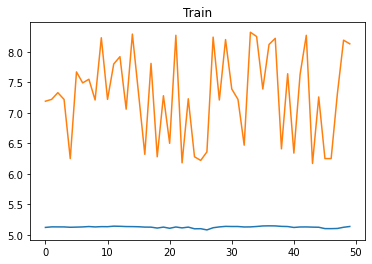

2/2 [==============================] - 3s 10ms/step


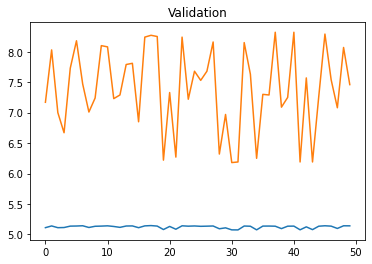

3/3 [==============================] - 0s 12ms/step


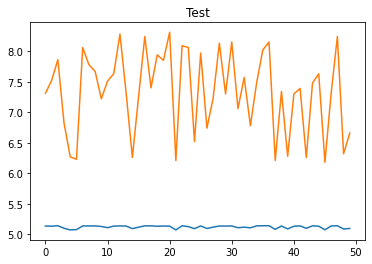

3/3 [==============================] - 0s 6ms/step


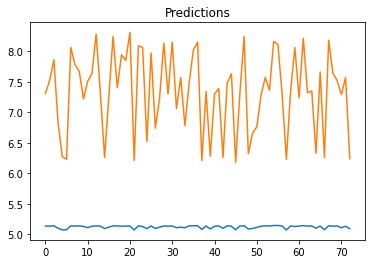

In [22]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 29.9414 - root_mean_squared_error: 5.4719INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 21s 2s/step - loss: 29.9414 - root_mean_squared_error: 5.4719 - val_loss: 26.9830 - val_root_mean_squared_error: 5.1945
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 26.5576 - root_mean_squared_error: 5.1534INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 26.2615 - root_mean_squared_error: 5.1246 - val_loss: 23.6221 - val_root_mean_squared_error: 4.8603
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 23.2609 - root_mean_squared_error: 4.8230INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 22.9527 - root_mean_squared_error: 4.7909 - val_loss: 20.6168 - val_root_mean_squared_error: 4.5406
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 19.9920 - root_mean_squared_error: 4.4712INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 19.9920 - root_mean_squared_error: 4.4712 - val_loss: 17.9431 - val_root_mean_squared_error: 4.2359
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 17.4101 - root_mean_squared_error: 4.1725INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 17.3567 - root_mean_squared_error: 4.1661 - val_loss: 15.5749 - val_root_mean_squared_error: 3.9465
Epoch 6/50
5/8 [=================>............] - ETA: 0s - loss: 15.1974 - root_mean_squared_error: 3.8984INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 15.0410 - root_mean_squared_error: 3.8783 - val_loss: 13.4906 - val_root_mean_squared_error: 3.6730
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 13.0005 - root_mean_squared_error: 3.6056INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 13.0140 - root_mean_squared_error: 3.6075 - val_loss: 11.6672 - val_root_mean_squared_error: 3.4157
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 11.2145 - root_mean_squared_error: 3.3488INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 11.2225 - root_mean_squared_error: 3.3500 - val_loss: 10.0617 - val_root_mean_squared_error: 3.1720
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 9.6557 - root_mean_squared_error: 3.1074INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 18s 3s/step - loss: 9.6557 - root_mean_squared_error: 3.1074 - val_loss: 8.6514 - val_root_mean_squared_error: 2.9413
Epoch 10/50
5/8 [=================>............] - ETA: 0s - loss: 8.3318 - root_mean_squared_error: 2.8865INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 8.2757 - root_mean_squared_error: 2.8768 - val_loss: 7.4195 - val_root_mean_squared_error: 2.7239
Epoch 11/50
5/8 [=================>............] - ETA: 0s - loss: 7.1462 - root_mean_squared_error: 2.6732INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 7.0750 - root_mean_squared_error: 2.6599 - val_loss: 6.3667 - val_root_mean_squared_error: 2.5232
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 6.0665 - root_mean_squared_error: 2.4630INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 6.0501 - root_mean_squared_error: 2.4597 - val_loss: 5.4575 - val_root_mean_squared_error: 2.3361
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 5.2026 - root_mean_squared_error: 2.2809INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 5.1621 - root_mean_squared_error: 2.2720 - val_loss: 4.6725 - val_root_mean_squared_error: 2.1616
Epoch 14/50
4/8 [==============>...............] - ETA: 0s - loss: 4.6751 - root_mean_squared_error: 2.1622INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 4.3983 - root_mean_squared_error: 2.0972 - val_loss: 3.9808 - val_root_mean_squared_error: 1.9952
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 3.8800 - root_mean_squared_error: 1.9698INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 3.7337 - root_mean_squared_error: 1.9323 - val_loss: 3.4225 - val_root_mean_squared_error: 1.8500
Epoch 16/50
5/8 [=================>............] - ETA: 0s - loss: 3.2346 - root_mean_squared_error: 1.7985INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 3.1879 - root_mean_squared_error: 1.7855 - val_loss: 2.9494 - val_root_mean_squared_error: 1.7174
Epoch 17/50
5/8 [=================>............] - ETA: 0s - loss: 2.8028 - root_mean_squared_error: 1.6742INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 997ms/step - loss: 2.7312 - root_mean_squared_error: 1.6526 - val_loss: 2.5539 - val_root_mean_squared_error: 1.5981
Epoch 18/50
5/8 [=================>............] - ETA: 0s - loss: 2.5129 - root_mean_squared_error: 1.5852INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2.3506 - root_mean_squared_error: 1.5332 - val_loss: 2.2219 - val_root_mean_squared_error: 1.4906
Epoch 19/50
6/8 [=====================>........] - ETA: 0s - loss: 2.0202 - root_mean_squared_error: 1.4214INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2.0269 - root_mean_squared_error: 1.4237 - val_loss: 1.9506 - val_root_mean_squared_error: 1.3966
Epoch 20/50
5/8 [=================>............] - ETA: 0s - loss: 1.8875 - root_mean_squared_error: 1.3739INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 1.7687 - root_mean_squared_error: 1.3299 - val_loss: 1.7195 - val_root_mean_squared_error: 1.3113
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 1.5485 - root_mean_squared_error: 1.2444INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.5485 - root_mean_squared_error: 1.2444 - val_loss: 1.5349 - val_root_mean_squared_error: 1.2389
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 1.3715 - root_mean_squared_error: 1.1711INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1.3659 - root_mean_squared_error: 1.1687 - val_loss: 1.3847 - val_root_mean_squared_error: 1.1767
Epoch 23/50
5/8 [=================>............] - ETA: 0s - loss: 1.2636 - root_mean_squared_error: 1.1241INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 24s 3s/step - loss: 1.2209 - root_mean_squared_error: 1.1049 - val_loss: 1.2546 - val_root_mean_squared_error: 1.1201
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 1.0949 - root_mean_squared_error: 1.0464INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.0924 - root_mean_squared_error: 1.0452 - val_loss: 1.1448 - val_root_mean_squared_error: 1.0700
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 0.9843 - root_mean_squared_error: 0.9921INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 0.9843 - root_mean_squared_error: 0.9921 - val_loss: 1.0516 - val_root_mean_squared_error: 1.0255
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 0.9080 - root_mean_squared_error: 0.9529INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.8946 - root_mean_squared_error: 0.9458 - val_loss: 0.9720 - val_root_mean_squared_error: 0.9859
Epoch 27/50
5/8 [=================>............] - ETA: 0s - loss: 0.9064 - root_mean_squared_error: 0.9521INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.8183 - root_mean_squared_error: 0.9046 - val_loss: 0.9086 - val_root_mean_squared_error: 0.9532
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 0.7263 - root_mean_squared_error: 0.8522INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.7541 - root_mean_squared_error: 0.8684 - val_loss: 0.8569 - val_root_mean_squared_error: 0.9257
Epoch 29/50
5/8 [=================>............] - ETA: 0s - loss: 0.6910 - root_mean_squared_error: 0.8313INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.7039 - root_mean_squared_error: 0.8390 - val_loss: 0.8112 - val_root_mean_squared_error: 0.9007
Epoch 30/50
5/8 [=================>............] - ETA: 0s - loss: 0.6559 - root_mean_squared_error: 0.8099INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 0.6592 - root_mean_squared_error: 0.8119 - val_loss: 0.7766 - val_root_mean_squared_error: 0.8812
Epoch 31/50
5/8 [=================>............] - ETA: 0s - loss: 0.5982 - root_mean_squared_error: 0.7734INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.6241 - root_mean_squared_error: 0.7900 - val_loss: 0.7461 - val_root_mean_squared_error: 0.8638
Epoch 32/50
6/8 [=====================>........] - ETA: 0s - loss: 0.6045 - root_mean_squared_error: 0.7775INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.5941 - root_mean_squared_error: 0.7708 - val_loss: 0.7196 - val_root_mean_squared_error: 0.8483
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 0.5666 - root_mean_squared_error: 0.7527INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.5666 - root_mean_squared_error: 0.7527 - val_loss: 0.6972 - val_root_mean_squared_error: 0.8350
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 0.6438 - root_mean_squared_error: 0.8024INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 0.5465 - root_mean_squared_error: 0.7392 - val_loss: 0.6782 - val_root_mean_squared_error: 0.8236
Epoch 35/50
5/8 [=================>............] - ETA: 0s - loss: 0.5254 - root_mean_squared_error: 0.7249INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.5261 - root_mean_squared_error: 0.7254 - val_loss: 0.6630 - val_root_mean_squared_error: 0.8143
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 0.5319 - root_mean_squared_error: 0.7293INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.5110 - root_mean_squared_error: 0.7149 - val_loss: 0.6502 - val_root_mean_squared_error: 0.8063
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 0.4987 - root_mean_squared_error: 0.7062INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 0.4991 - root_mean_squared_error: 0.7065 - val_loss: 0.6399 - val_root_mean_squared_error: 0.7999
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 0.4880 - root_mean_squared_error: 0.6986INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 857ms/step - loss: 0.4880 - root_mean_squared_error: 0.6986 - val_loss: 0.6314 - val_root_mean_squared_error: 0.7946
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 0.4795 - root_mean_squared_error: 0.6925INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.4795 - root_mean_squared_error: 0.6925 - val_loss: 0.6248 - val_root_mean_squared_error: 0.7904
Epoch 40/50
5/8 [=================>............] - ETA: 0s - loss: 0.4696 - root_mean_squared_error: 0.6853INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.4736 - root_mean_squared_error: 0.6882 - val_loss: 0.6184 - val_root_mean_squared_error: 0.7864
Epoch 41/50
5/8 [=================>............] - ETA: 0s - loss: 0.4777 - root_mean_squared_error: 0.6911INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.4671 - root_mean_squared_error: 0.6834 - val_loss: 0.6137 - val_root_mean_squared_error: 0.7834
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 0.4756 - root_mean_squared_error: 0.6896INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.4639 - root_mean_squared_error: 0.6811 - val_loss: 0.6097 - val_root_mean_squared_error: 0.7808
Epoch 43/50
5/8 [=================>............] - ETA: 0s - loss: 0.4542 - root_mean_squared_error: 0.6739INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.4602 - root_mean_squared_error: 0.6784 - val_loss: 0.6067 - val_root_mean_squared_error: 0.7789
Epoch 44/50
2/8 [======>.......................] - ETA: 0s - loss: 0.4914 - root_mean_squared_error: 0.7010INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 0.4572 - root_mean_squared_error: 0.6762 - val_loss: 0.6040 - val_root_mean_squared_error: 0.7772
Epoch 45/50
5/8 [=================>............] - ETA: 0s - loss: 0.4832 - root_mean_squared_error: 0.6951INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 871ms/step - loss: 0.4550 - root_mean_squared_error: 0.6745 - val_loss: 0.6014 - val_root_mean_squared_error: 0.7755
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 0.4481 - root_mean_squared_error: 0.6694INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 20s 3s/step - loss: 0.4531 - root_mean_squared_error: 0.6732 - val_loss: 0.5990 - val_root_mean_squared_error: 0.7740
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 0.4520 - root_mean_squared_error: 0.6723INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.4520 - root_mean_squared_error: 0.6723 - val_loss: 0.5969 - val_root_mean_squared_error: 0.7726
Epoch 48/50
6/8 [=====================>........] - ETA: 0s - loss: 0.4305 - root_mean_squared_error: 0.6561INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.4505 - root_mean_squared_error: 0.6712 - val_loss: 0.5947 - val_root_mean_squared_error: 0.7712
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 0.4490 - root_mean_squared_error: 0.6701INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.4493 - root_mean_squared_error: 0.6703 - val_loss: 0.5927 - val_root_mean_squared_error: 0.7699
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 0.4535 - root_mean_squared_error: 0.6734INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 2s 8ms/step


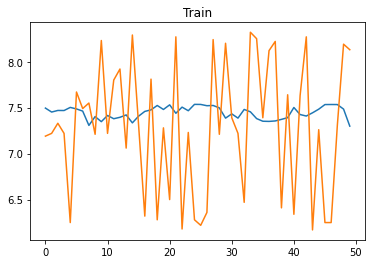

2/2 [==============================] - 1s 16ms/step


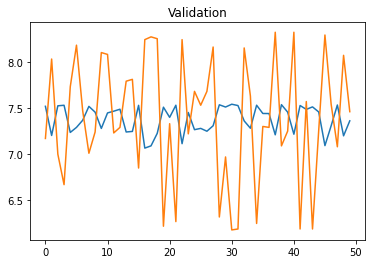

3/3 [==============================] - 0s 4ms/step


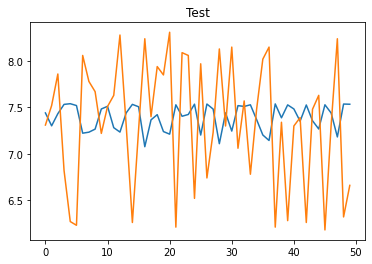

3/3 [==============================] - 0s 4ms/step


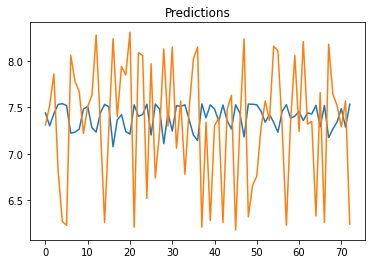

In [23]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_rnn_mse = plot_predictions1(model,x_test, y_test)

# AutoEncoder

### CNN

Epoch 1/50
5/8 [=================>............] - ETA: 0s - loss: 30832.1211 - root_mean_squared_error: 175.5908 

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 17s 1s/step - loss: 27064.8008 - root_mean_squared_error: 164.5138 - val_loss: 1105.1068 - val_root_mean_squared_error: 33.2431
Epoch 2/50
8/8 [==============================] - 0s 34ms/step - loss: 21268.1992 - root_mean_squared_error: 145.8362 - val_loss: 9782.2080 - val_root_mean_squared_error: 98.9050
Epoch 3/50
8/8 [==============================] - 0s 53ms/step - loss: 17629.3633 - root_mean_squared_error: 132.7756 - val_loss: 5979.6660 - val_root_mean_squared_error: 77.3283
Epoch 4/50
8/8 [==============================] - 0s 33ms/step - loss: 10956.2393 - root_mean_squared_error: 104.6721 - val_loss: 1335.3030 - val_root_mean_squared_error: 36.5418
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 11546.6680 - root_mean_squared_error: 107.4554

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 791ms/step - loss: 11548.7305 - root_mean_squared_error: 107.4650 - val_loss: 92.5893 - val_root_mean_squared_error: 9.6223
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 8812.2822 - root_mean_squared_error: 93.8738

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 730ms/step - loss: 8702.8975 - root_mean_squared_error: 93.2893 - val_loss: 43.6947 - val_root_mean_squared_error: 6.6102
Epoch 7/50
8/8 [==============================] - 0s 26ms/step - loss: 12630.0615 - root_mean_squared_error: 112.3835 - val_loss: 87.1872 - val_root_mean_squared_error: 9.3374
Epoch 8/50
8/8 [==============================] - 0s 36ms/step - loss: 10276.5117 - root_mean_squared_error: 101.3731 - val_loss: 175.1576 - val_root_mean_squared_error: 13.2347
Epoch 9/50
8/8 [==============================] - 0s 35ms/step - loss: 8434.9131 - root_mean_squared_error: 91.8418 - val_loss: 106.8876 - val_root_mean_squared_error: 10.3386
Epoch 10/50
8/8 [==============================] - 0s 36ms/step - loss: 10619.9971 - root_mean_squared_error: 103.0534 - val_loss: 251.6802 - val_root_mean_squared_error: 15.8644
Epoch 11/50
8/8 [==============================] - 0s 25ms/step - loss: 7314.5537 - root_mean_squared_error: 85.5252 - val_loss

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 973ms/step - loss: 7319.4741 - root_mean_squared_error: 85.5539 - val_loss: 29.4354 - val_root_mean_squared_error: 5.4254
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 7636.8345 - root_mean_squared_error: 87.3890

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 7620.1455 - root_mean_squared_error: 87.2934 - val_loss: 6.4783 - val_root_mean_squared_error: 2.5453
Epoch 14/50
8/8 [==============================] - 1s 67ms/step - loss: 8141.6118 - root_mean_squared_error: 90.2309 - val_loss: 11.9001 - val_root_mean_squared_error: 3.4497
Epoch 15/50
8/8 [==============================] - 0s 54ms/step - loss: 7276.2407 - root_mean_squared_error: 85.3009 - val_loss: 14.1515 - val_root_mean_squared_error: 3.7618
Epoch 16/50
8/8 [==============================] - 0s 43ms/step - loss: 7304.2441 - root_mean_squared_error: 85.4649 - val_loss: 36.4788 - val_root_mean_squared_error: 6.0398
Epoch 17/50
8/8 [==============================] - 0s 51ms/step - loss: 6630.9678 - root_mean_squared_error: 81.4308 - val_loss: 73.3215 - val_root_mean_squared_error: 8.5628
Epoch 18/50
8/8 [==============================] - 0s 38ms/step - loss: 5253.0679 - root_mean_squared_error: 72.4781 - val_loss: 155.9487 - 

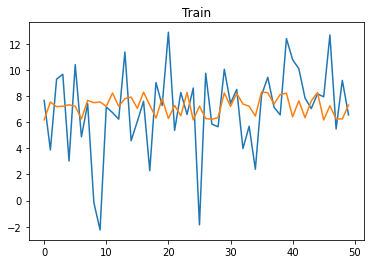

2/2 [==============================] - 2s 10ms/step


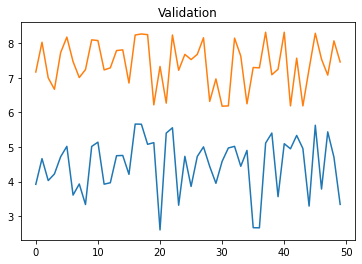

3/3 [==============================] - 0s 13ms/step


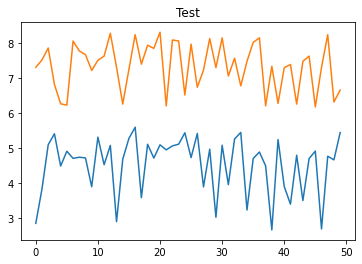

3/3 [==============================] - 0s 4ms/step


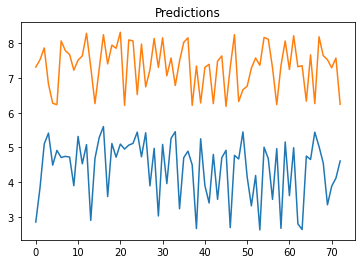

In [24]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [25]:
auto_cnn_mse

9.715680667396427

### GRU

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 49.4197 - root_mean_squared_error: 7.0299

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 48s 4s/step - loss: 49.4209 - root_mean_squared_error: 7.0300 - val_loss: 46.6352 - val_root_mean_squared_error: 6.8290
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 46.4031 - root_mean_squared_error: 6.8120

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 46.2208 - root_mean_squared_error: 6.7986 - val_loss: 43.7724 - val_root_mean_squared_error: 6.6161
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 43.6711 - root_mean_squared_error: 6.6084

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 43.6473 - root_mean_squared_error: 6.6066 - val_loss: 41.0179 - val_root_mean_squared_error: 6.4045
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 40.9006 - root_mean_squared_error: 6.3954

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 40.9006 - root_mean_squared_error: 6.3954 - val_loss: 38.3737 - val_root_mean_squared_error: 6.1947
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 38.3303 - root_mean_squared_error: 6.1911

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 38.3197 - root_mean_squared_error: 6.1903 - val_loss: 35.8174 - val_root_mean_squared_error: 5.9848
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 35.5535 - root_mean_squared_error: 5.9627

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 35.4598 - root_mean_squared_error: 5.9548 - val_loss: 33.3310 - val_root_mean_squared_error: 5.7733
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 33.2693 - root_mean_squared_error: 5.7680

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 33.4126 - root_mean_squared_error: 5.7804 - val_loss: 30.9090 - val_root_mean_squared_error: 5.5596
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 31.1247 - root_mean_squared_error: 5.5790

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 31.0594 - root_mean_squared_error: 5.5731 - val_loss: 28.5895 - val_root_mean_squared_error: 5.3469
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 28.4346 - root_mean_squared_error: 5.3324

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 28.2123 - root_mean_squared_error: 5.3115 - val_loss: 26.3588 - val_root_mean_squared_error: 5.1341
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 26.2577 - root_mean_squared_error: 5.1242

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 26.2577 - root_mean_squared_error: 5.1242 - val_loss: 24.1393 - val_root_mean_squared_error: 4.9132
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 24.2494 - root_mean_squared_error: 4.9244

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 24.2409 - root_mean_squared_error: 4.9235 - val_loss: 21.9802 - val_root_mean_squared_error: 4.6883
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 22.0591 - root_mean_squared_error: 4.6967

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 22.0765 - root_mean_squared_error: 4.6986 - val_loss: 19.9401 - val_root_mean_squared_error: 4.4654
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 19.7617 - root_mean_squared_error: 4.4454

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 19.8632 - root_mean_squared_error: 4.4568 - val_loss: 17.9844 - val_root_mean_squared_error: 4.2408
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 17.8686 - root_mean_squared_error: 4.2271

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 17.7449 - root_mean_squared_error: 4.2125 - val_loss: 16.1010 - val_root_mean_squared_error: 4.0126
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 16.1015 - root_mean_squared_error: 4.0127

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 15.6420 - root_mean_squared_error: 3.9550 - val_loss: 14.3254 - val_root_mean_squared_error: 3.7849
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 14.5044 - root_mean_squared_error: 3.8085

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 14.5044 - root_mean_squared_error: 3.8085 - val_loss: 12.6712 - val_root_mean_squared_error: 3.5597
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 13.1770 - root_mean_squared_error: 3.6300

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 12.9363 - root_mean_squared_error: 3.5967 - val_loss: 11.1380 - val_root_mean_squared_error: 3.3374
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 11.0623 - root_mean_squared_error: 3.3260

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 11.0623 - root_mean_squared_error: 3.3260 - val_loss: 9.7314 - val_root_mean_squared_error: 3.1195
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 10.3103 - root_mean_squared_error: 3.2110

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 10.3341 - root_mean_squared_error: 3.2147 - val_loss: 8.4360 - val_root_mean_squared_error: 2.9045
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 8.4459 - root_mean_squared_error: 2.9062

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 8.5527 - root_mean_squared_error: 2.9245 - val_loss: 7.2733 - val_root_mean_squared_error: 2.6969
Epoch 21/50
5/8 [=================>............] - ETA: 0s - loss: 7.1873 - root_mean_squared_error: 2.6809

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 7.3363 - root_mean_squared_error: 2.7086 - val_loss: 6.2381 - val_root_mean_squared_error: 2.4976
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 6.3329 - root_mean_squared_error: 2.5165

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 6.2699 - root_mean_squared_error: 2.5040 - val_loss: 5.3313 - val_root_mean_squared_error: 2.3090
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 5.4953 - root_mean_squared_error: 2.3442

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 5.4953 - root_mean_squared_error: 2.3442 - val_loss: 4.5553 - val_root_mean_squared_error: 2.1343
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 4.8003 - root_mean_squared_error: 2.1910

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 4.8003 - root_mean_squared_error: 2.1910 - val_loss: 3.8714 - val_root_mean_squared_error: 1.9676
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 3.8605 - root_mean_squared_error: 1.9648

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 3.8605 - root_mean_squared_error: 1.9648 - val_loss: 3.2903 - val_root_mean_squared_error: 1.8139
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 3.4810 - root_mean_squared_error: 1.8657

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 3.4810 - root_mean_squared_error: 1.8657 - val_loss: 2.7971 - val_root_mean_squared_error: 1.6724
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 3.0712 - root_mean_squared_error: 1.7525

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 3.0819 - root_mean_squared_error: 1.7555 - val_loss: 2.3751 - val_root_mean_squared_error: 1.5411
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2.4609 - root_mean_squared_error: 1.5687

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2.4903 - root_mean_squared_error: 1.5781 - val_loss: 2.0238 - val_root_mean_squared_error: 1.4226
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2.3883 - root_mean_squared_error: 1.5454

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2.3883 - root_mean_squared_error: 1.5454 - val_loss: 1.7245 - val_root_mean_squared_error: 1.3132
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 1.9303 - root_mean_squared_error: 1.3893

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 1.9837 - root_mean_squared_error: 1.4084 - val_loss: 1.4798 - val_root_mean_squared_error: 1.2165
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 1.8292 - root_mean_squared_error: 1.3525

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 1.8292 - root_mean_squared_error: 1.3525 - val_loss: 1.2733 - val_root_mean_squared_error: 1.1284
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 1.4765 - root_mean_squared_error: 1.2151

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 1.4537 - root_mean_squared_error: 1.2057 - val_loss: 1.1027 - val_root_mean_squared_error: 1.0501
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 1.3602 - root_mean_squared_error: 1.1663

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 1.3647 - root_mean_squared_error: 1.1682 - val_loss: 0.9700 - val_root_mean_squared_error: 0.9849
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 1.3779 - root_mean_squared_error: 1.1738

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 32s 4s/step - loss: 1.3660 - root_mean_squared_error: 1.1688 - val_loss: 0.8570 - val_root_mean_squared_error: 0.9257
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 1.1331 - root_mean_squared_error: 1.0645

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 1.1391 - root_mean_squared_error: 1.0673 - val_loss: 0.7666 - val_root_mean_squared_error: 0.8755
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 0.9498 - root_mean_squared_error: 0.9746

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 0.9316 - root_mean_squared_error: 0.9652 - val_loss: 0.6972 - val_root_mean_squared_error: 0.8350
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 0.9844 - root_mean_squared_error: 0.9922

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 0.9745 - root_mean_squared_error: 0.9872 - val_loss: 0.6398 - val_root_mean_squared_error: 0.7999
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 0.9477 - root_mean_squared_error: 0.9735

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 0.9477 - root_mean_squared_error: 0.9735 - val_loss: 0.5953 - val_root_mean_squared_error: 0.7716
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 0.9659 - root_mean_squared_error: 0.9828

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 0.9554 - root_mean_squared_error: 0.9774 - val_loss: 0.5561 - val_root_mean_squared_error: 0.7457
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 0.8948 - root_mean_squared_error: 0.9459

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 0.8958 - root_mean_squared_error: 0.9465 - val_loss: 0.5240 - val_root_mean_squared_error: 0.7239
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 0.8200 - root_mean_squared_error: 0.9055

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 0.8200 - root_mean_squared_error: 0.9055 - val_loss: 0.4962 - val_root_mean_squared_error: 0.7044
Epoch 42/50
5/8 [=================>............] - ETA: 0s - loss: 0.9287 - root_mean_squared_error: 0.9637

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 0.8552 - root_mean_squared_error: 0.9248 - val_loss: 0.4732 - val_root_mean_squared_error: 0.6879
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 0.8444 - root_mean_squared_error: 0.9189

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 0.8373 - root_mean_squared_error: 0.9151 - val_loss: 0.4570 - val_root_mean_squared_error: 0.6760
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 0.6845 - root_mean_squared_error: 0.8274

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 0.6845 - root_mean_squared_error: 0.8274 - val_loss: 0.4424 - val_root_mean_squared_error: 0.6651
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 0.6694 - root_mean_squared_error: 0.8182

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 0.6902 - root_mean_squared_error: 0.8308 - val_loss: 0.4319 - val_root_mean_squared_error: 0.6572
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 0.7474 - root_mean_squared_error: 0.8645

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 0.7402 - root_mean_squared_error: 0.8603 - val_loss: 0.4242 - val_root_mean_squared_error: 0.6513
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 0.6815 - root_mean_squared_error: 0.8255

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 0.6665 - root_mean_squared_error: 0.8164 - val_loss: 0.4186 - val_root_mean_squared_error: 0.6470
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 0.7725 - root_mean_squared_error: 0.8789

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 0.7554 - root_mean_squared_error: 0.8691 - val_loss: 0.4148 - val_root_mean_squared_error: 0.6440
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 0.7378 - root_mean_squared_error: 0.8589

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 0.7344 - root_mean_squared_error: 0.8570 - val_loss: 0.4113 - val_root_mean_squared_error: 0.6414
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 0.6115 - root_mean_squared_error: 0.7820

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 6s 101ms/step


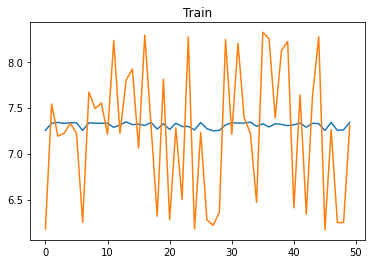

2/2 [==============================] - 2s 9ms/step


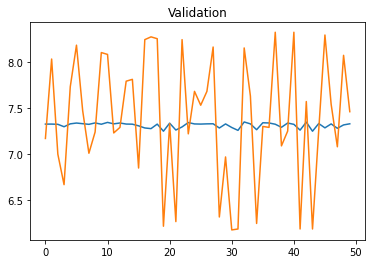

3/3 [==============================] - 0s 7ms/step


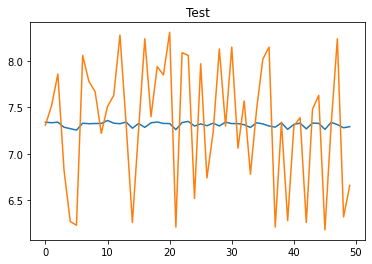

3/3 [==============================] - 0s 5ms/step


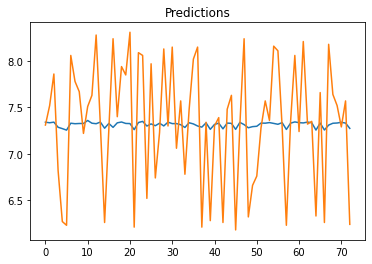

In [26]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [27]:
auto_gru_mse

0.3995470134322743

### LSTM

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 63.2703 - root_mean_squared_error: 7.9543

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 48s 5s/step - loss: 63.0760 - root_mean_squared_error: 7.9420 - val_loss: 60.0533 - val_root_mean_squared_error: 7.7494
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 60.7570 - root_mean_squared_error: 7.7947

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 60.1815 - root_mean_squared_error: 7.7577 - val_loss: 58.2160 - val_root_mean_squared_error: 7.6299
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 59.2964 - root_mean_squared_error: 7.7004

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 59.3271 - root_mean_squared_error: 7.7024 - val_loss: 56.3851 - val_root_mean_squared_error: 7.5090
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 56.9016 - root_mean_squared_error: 7.5433

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 57.0352 - root_mean_squared_error: 7.5522 - val_loss: 54.1637 - val_root_mean_squared_error: 7.3596
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 55.3337 - root_mean_squared_error: 7.4387

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 55.2006 - root_mean_squared_error: 7.4297 - val_loss: 51.8470 - val_root_mean_squared_error: 7.2005
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 52.9952 - root_mean_squared_error: 7.2798

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 52.9952 - root_mean_squared_error: 7.2798 - val_loss: 49.4874 - val_root_mean_squared_error: 7.0347
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 50.8082 - root_mean_squared_error: 7.1280

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 51s 7s/step - loss: 50.4555 - root_mean_squared_error: 7.1032 - val_loss: 47.0062 - val_root_mean_squared_error: 6.8561
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 48.2234 - root_mean_squared_error: 6.9443

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 48.1923 - root_mean_squared_error: 6.9421 - val_loss: 44.6482 - val_root_mean_squared_error: 6.6819
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 45.9697 - root_mean_squared_error: 6.7801

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 45.9352 - root_mean_squared_error: 6.7775 - val_loss: 42.5201 - val_root_mean_squared_error: 6.5207
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 43.4700 - root_mean_squared_error: 6.5932

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 43.5821 - root_mean_squared_error: 6.6017 - val_loss: 40.4982 - val_root_mean_squared_error: 6.3638
Epoch 11/50
6/8 [=====================>........] - ETA: 0s - loss: 41.9039 - root_mean_squared_error: 6.4733

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 41.8292 - root_mean_squared_error: 6.4676 - val_loss: 38.6018 - val_root_mean_squared_error: 6.2130
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 39.7226 - root_mean_squared_error: 6.3026

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 39.7575 - root_mean_squared_error: 6.3054 - val_loss: 36.8728 - val_root_mean_squared_error: 6.0723
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 37.9795 - root_mean_squared_error: 6.1628

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 47s 7s/step - loss: 37.7484 - root_mean_squared_error: 6.1440 - val_loss: 34.8548 - val_root_mean_squared_error: 5.9038
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 35.3903 - root_mean_squared_error: 5.9490

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 35.4384 - root_mean_squared_error: 5.9530 - val_loss: 32.8749 - val_root_mean_squared_error: 5.7337
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 33.4903 - root_mean_squared_error: 5.7871

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 33.3346 - root_mean_squared_error: 5.7736 - val_loss: 30.8698 - val_root_mean_squared_error: 5.5561
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 31.8736 - root_mean_squared_error: 5.6457

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 31.8008 - root_mean_squared_error: 5.6392 - val_loss: 28.8127 - val_root_mean_squared_error: 5.3678
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 29.4604 - root_mean_squared_error: 5.4277

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 29.4604 - root_mean_squared_error: 5.4277 - val_loss: 26.9401 - val_root_mean_squared_error: 5.1904
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 27.6011 - root_mean_squared_error: 5.2537

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 27.6524 - root_mean_squared_error: 5.2586 - val_loss: 25.1681 - val_root_mean_squared_error: 5.0168
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 25.7961 - root_mean_squared_error: 5.0790

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 25.8277 - root_mean_squared_error: 5.0821 - val_loss: 23.4346 - val_root_mean_squared_error: 4.8409
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 23.8680 - root_mean_squared_error: 4.8855

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 23.8705 - root_mean_squared_error: 4.8857 - val_loss: 21.7393 - val_root_mean_squared_error: 4.6625
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 22.6392 - root_mean_squared_error: 4.7581

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 22.6392 - root_mean_squared_error: 4.7581 - val_loss: 20.1018 - val_root_mean_squared_error: 4.4835
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 20.9732 - root_mean_squared_error: 4.5797

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 20.7951 - root_mean_squared_error: 4.5602 - val_loss: 18.5458 - val_root_mean_squared_error: 4.3065
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 19.2128 - root_mean_squared_error: 4.3832

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 19.3790 - root_mean_squared_error: 4.4022 - val_loss: 17.0100 - val_root_mean_squared_error: 4.1243
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 17.6554 - root_mean_squared_error: 4.2018

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 17.6554 - root_mean_squared_error: 4.2018 - val_loss: 15.4895 - val_root_mean_squared_error: 3.9357
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 15.9246 - root_mean_squared_error: 3.9906

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 15.8232 - root_mean_squared_error: 3.9778 - val_loss: 14.0817 - val_root_mean_squared_error: 3.7526
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 14.7845 - root_mean_squared_error: 3.8451

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 14.5982 - root_mean_squared_error: 3.8208 - val_loss: 12.7628 - val_root_mean_squared_error: 3.5725
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 13.2663 - root_mean_squared_error: 3.6423

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 13.2007 - root_mean_squared_error: 3.6333 - val_loss: 11.5540 - val_root_mean_squared_error: 3.3991
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 12.4791 - root_mean_squared_error: 3.5326

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 12.3288 - root_mean_squared_error: 3.5112 - val_loss: 10.3485 - val_root_mean_squared_error: 3.2169
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 10.8825 - root_mean_squared_error: 3.2989

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 10.9357 - root_mean_squared_error: 3.3069 - val_loss: 9.2354 - val_root_mean_squared_error: 3.0390
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 9.7776 - root_mean_squared_error: 3.1269 

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 9.7942 - root_mean_squared_error: 3.1296 - val_loss: 8.2550 - val_root_mean_squared_error: 2.8731
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 8.7753 - root_mean_squared_error: 2.9623

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 8.7753 - root_mean_squared_error: 2.9623 - val_loss: 7.3472 - val_root_mean_squared_error: 2.7106
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 7.7116 - root_mean_squared_error: 2.7770

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 7.7116 - root_mean_squared_error: 2.7770 - val_loss: 6.5126 - val_root_mean_squared_error: 2.5520
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 7.1258 - root_mean_squared_error: 2.6694

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 7.1258 - root_mean_squared_error: 2.6694 - val_loss: 5.7465 - val_root_mean_squared_error: 2.3972
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 6.2110 - root_mean_squared_error: 2.4922

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 6.2034 - root_mean_squared_error: 2.4907 - val_loss: 5.0310 - val_root_mean_squared_error: 2.2430
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 5.5899 - root_mean_squared_error: 2.3643

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 5.5899 - root_mean_squared_error: 2.3643 - val_loss: 4.3779 - val_root_mean_squared_error: 2.0923
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 4.7295 - root_mean_squared_error: 2.1747

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 4.7396 - root_mean_squared_error: 2.1771 - val_loss: 3.7935 - val_root_mean_squared_error: 1.9477
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 4.0498 - root_mean_squared_error: 2.0124

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 4.0498 - root_mean_squared_error: 2.0124 - val_loss: 3.2710 - val_root_mean_squared_error: 1.8086
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 3.7162 - root_mean_squared_error: 1.9278

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 3.6948 - root_mean_squared_error: 1.9222 - val_loss: 2.8160 - val_root_mean_squared_error: 1.6781
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 3.5274 - root_mean_squared_error: 1.8781

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 46s 7s/step - loss: 3.5274 - root_mean_squared_error: 1.8781 - val_loss: 2.4074 - val_root_mean_squared_error: 1.5516
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 2.9844 - root_mean_squared_error: 1.7275

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2.9844 - root_mean_squared_error: 1.7275 - val_loss: 2.0404 - val_root_mean_squared_error: 1.4284
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 2.6604 - root_mean_squared_error: 1.6311

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 47s 7s/step - loss: 2.6604 - root_mean_squared_error: 1.6311 - val_loss: 1.7292 - val_root_mean_squared_error: 1.3150
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 2.4939 - root_mean_squared_error: 1.5792

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2.4388 - root_mean_squared_error: 1.5617 - val_loss: 1.4584 - val_root_mean_squared_error: 1.2076
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 1.9788 - root_mean_squared_error: 1.4067

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 1.9559 - root_mean_squared_error: 1.3985 - val_loss: 1.2341 - val_root_mean_squared_error: 1.1109
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 1.8624 - root_mean_squared_error: 1.3647

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 1.9237 - root_mean_squared_error: 1.3870 - val_loss: 1.0521 - val_root_mean_squared_error: 1.0257
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 1.3800 - root_mean_squared_error: 1.1747

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 1.3975 - root_mean_squared_error: 1.1821 - val_loss: 0.8975 - val_root_mean_squared_error: 0.9474
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 1.5919 - root_mean_squared_error: 1.2617

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 1.5951 - root_mean_squared_error: 1.2630 - val_loss: 0.7609 - val_root_mean_squared_error: 0.8723
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 1.7654 - root_mean_squared_error: 1.3287

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 1.7654 - root_mean_squared_error: 1.3287 - val_loss: 0.6450 - val_root_mean_squared_error: 0.8031
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 1.2786 - root_mean_squared_error: 1.1307

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 1.2786 - root_mean_squared_error: 1.1307 - val_loss: 0.5508 - val_root_mean_squared_error: 0.7421
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 1.1775 - root_mean_squared_error: 1.0851

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 1.1775 - root_mean_squared_error: 1.0851 - val_loss: 0.4826 - val_root_mean_squared_error: 0.6947
Epoch 50/50
5/8 [=================>............] - ETA: 0s - loss: 0.9943 - root_mean_squared_error: 0.9971

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 8ms/step


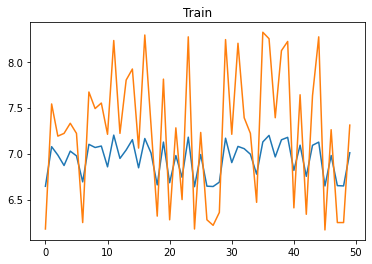

2/2 [==============================] - 2s 11ms/step


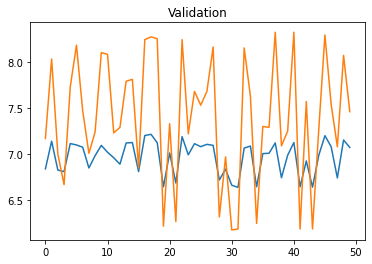

3/3 [==============================] - 0s 8ms/step


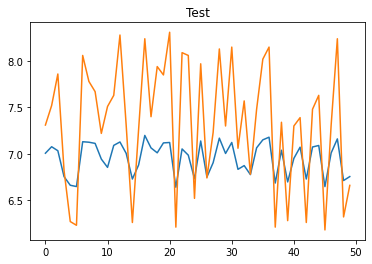

3/3 [==============================] - 0s 5ms/step


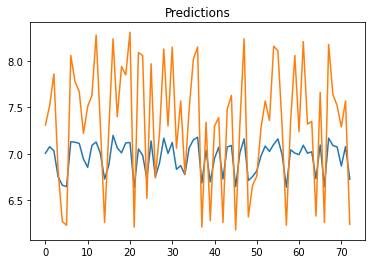

In [28]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
model.add(Dense(8, 'relu'))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [29]:
auto_lstm_mse

0.39058248678990565

### RNN

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 63.6607 - root_mean_squared_error: 7.9788 INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 22s 2s/step - loss: 63.5186 - root_mean_squared_error: 7.9699 - val_loss: 59.7543 - val_root_mean_squared_error: 7.7301
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 59.5607 - root_mean_squared_error: 7.7176INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 19s 3s/step - loss: 58.4301 - root_mean_squared_error: 7.6440 - val_loss: 54.5827 - val_root_mean_squared_error: 7.3880
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 56.3432 - root_mean_squared_error: 7.5062INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 53.0161 - root_mean_squared_error: 7.2812 - val_loss: 49.8400 - val_root_mean_squared_error: 7.0597
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 49.5621 - root_mean_squared_error: 7.0400INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 49.5621 - root_mean_squared_error: 7.0400 - val_loss: 45.4760 - val_root_mean_squared_error: 6.7436
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 45.0169 - root_mean_squared_error: 6.7095INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 45.0169 - root_mean_squared_error: 6.7095 - val_loss: 41.4548 - val_root_mean_squared_error: 6.4385
Epoch 6/50
5/8 [=================>............] - ETA: 0s - loss: 40.8545 - root_mean_squared_error: 6.3917INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 40.3114 - root_mean_squared_error: 6.3491 - val_loss: 37.7355 - val_root_mean_squared_error: 6.1429
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 36.7022 - root_mean_squared_error: 6.0582INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 36.7656 - root_mean_squared_error: 6.0635 - val_loss: 34.2794 - val_root_mean_squared_error: 5.8549
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 32.9209 - root_mean_squared_error: 5.7377INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 24s 3s/step - loss: 32.9209 - root_mean_squared_error: 5.7377 - val_loss: 31.0709 - val_root_mean_squared_error: 5.5741
Epoch 9/50
4/8 [==============>...............] - ETA: 0s - loss: 32.1716 - root_mean_squared_error: 5.6720INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 31.1296 - root_mean_squared_error: 5.5794 - val_loss: 28.1060 - val_root_mean_squared_error: 5.3015
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 28.5525 - root_mean_squared_error: 5.3435INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 27.9813 - root_mean_squared_error: 5.2897 - val_loss: 25.3651 - val_root_mean_squared_error: 5.0364
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 24.9593 - root_mean_squared_error: 4.9959INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 24.9593 - root_mean_squared_error: 4.9959 - val_loss: 22.8624 - val_root_mean_squared_error: 4.7815
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 22.6594 - root_mean_squared_error: 4.7602INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 22.6594 - root_mean_squared_error: 4.7602 - val_loss: 20.5693 - val_root_mean_squared_error: 4.5353
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 20.1628 - root_mean_squared_error: 4.4903INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 19.9817 - root_mean_squared_error: 4.4701 - val_loss: 18.4728 - val_root_mean_squared_error: 4.2980
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 18.1975 - root_mean_squared_error: 4.2659INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 18.3073 - root_mean_squared_error: 4.2787 - val_loss: 16.5388 - val_root_mean_squared_error: 4.0668
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 16.2941 - root_mean_squared_error: 4.0366INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 16.1908 - root_mean_squared_error: 4.0238 - val_loss: 14.7630 - val_root_mean_squared_error: 3.8423
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 14.7793 - root_mean_squared_error: 3.8444INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 14.7914 - root_mean_squared_error: 3.8460 - val_loss: 13.1490 - val_root_mean_squared_error: 3.6262
Epoch 17/50
4/8 [==============>...............] - ETA: 0s - loss: 13.5529 - root_mean_squared_error: 3.6814INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 13.3371 - root_mean_squared_error: 3.6520 - val_loss: 11.6632 - val_root_mean_squared_error: 3.4151
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 11.5485 - root_mean_squared_error: 3.3983INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 1s/step - loss: 11.5485 - root_mean_squared_error: 3.3983 - val_loss: 10.3065 - val_root_mean_squared_error: 3.2104
Epoch 19/50
5/8 [=================>............] - ETA: 0s - loss: 10.6571 - root_mean_squared_error: 3.2645INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 10.3413 - root_mean_squared_error: 3.2158 - val_loss: 9.0796 - val_root_mean_squared_error: 3.0132
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 9.1858 - root_mean_squared_error: 3.0308INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 9.1858 - root_mean_squared_error: 3.0308 - val_loss: 7.9743 - val_root_mean_squared_error: 2.8239
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 8.3525 - root_mean_squared_error: 2.8901INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 8.2531 - root_mean_squared_error: 2.8728 - val_loss: 6.9745 - val_root_mean_squared_error: 2.6409
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 7.1309 - root_mean_squared_error: 2.6704INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 7.1309 - root_mean_squared_error: 2.6704 - val_loss: 6.0947 - val_root_mean_squared_error: 2.4687
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 6.2743 - root_mean_squared_error: 2.5049INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 6.2053 - root_mean_squared_error: 2.4910 - val_loss: 5.3084 - val_root_mean_squared_error: 2.3040
Epoch 24/50
5/8 [=================>............] - ETA: 0s - loss: 6.1350 - root_mean_squared_error: 2.4769INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 5.7075 - root_mean_squared_error: 2.3890 - val_loss: 4.5973 - val_root_mean_squared_error: 2.1441
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 4.8990 - root_mean_squared_error: 2.2134INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 4.8834 - root_mean_squared_error: 2.2098 - val_loss: 3.9755 - val_root_mean_squared_error: 1.9939
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 4.8320 - root_mean_squared_error: 2.1982INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 4.6564 - root_mean_squared_error: 2.1579 - val_loss: 3.4136 - val_root_mean_squared_error: 1.8476
Epoch 27/50
5/8 [=================>............] - ETA: 0s - loss: 4.1254 - root_mean_squared_error: 2.0311INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 4.1355 - root_mean_squared_error: 2.0336 - val_loss: 2.9206 - val_root_mean_squared_error: 1.7090
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 3.5672 - root_mean_squared_error: 1.8887INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 19s 3s/step - loss: 3.4328 - root_mean_squared_error: 1.8528 - val_loss: 2.4946 - val_root_mean_squared_error: 1.5794
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 2.9873 - root_mean_squared_error: 1.7284INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2.9280 - root_mean_squared_error: 1.7111 - val_loss: 2.1390 - val_root_mean_squared_error: 1.4625
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 2.5420 - root_mean_squared_error: 1.5944INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2.5576 - root_mean_squared_error: 1.5992 - val_loss: 1.8424 - val_root_mean_squared_error: 1.3573
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2.5011 - root_mean_squared_error: 1.5815INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2.5011 - root_mean_squared_error: 1.5815 - val_loss: 1.5808 - val_root_mean_squared_error: 1.2573
Epoch 32/50
6/8 [=====================>........] - ETA: 0s - loss: 2.2489 - root_mean_squared_error: 1.4996INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2.1962 - root_mean_squared_error: 1.4820 - val_loss: 1.3516 - val_root_mean_squared_error: 1.1626
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 2.0728 - root_mean_squared_error: 1.4397INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2.1427 - root_mean_squared_error: 1.4638 - val_loss: 1.1576 - val_root_mean_squared_error: 1.0759
Epoch 34/50
5/8 [=================>............] - ETA: 0s - loss: 1.8392 - root_mean_squared_error: 1.3562INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 1.7990 - root_mean_squared_error: 1.3413 - val_loss: 0.9916 - val_root_mean_squared_error: 0.9958
Epoch 35/50
5/8 [=================>............] - ETA: 0s - loss: 2.0161 - root_mean_squared_error: 1.4199INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 19s 3s/step - loss: 1.9482 - root_mean_squared_error: 1.3958 - val_loss: 0.8525 - val_root_mean_squared_error: 0.9233
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 1.2892 - root_mean_squared_error: 1.1354INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1.3237 - root_mean_squared_error: 1.1505 - val_loss: 0.7412 - val_root_mean_squared_error: 0.8609
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 1.6330 - root_mean_squared_error: 1.2779INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 1.5962 - root_mean_squared_error: 1.2634 - val_loss: 0.6403 - val_root_mean_squared_error: 0.8002
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 1.3399 - root_mean_squared_error: 1.1575INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 1.4641 - root_mean_squared_error: 1.2100 - val_loss: 0.5580 - val_root_mean_squared_error: 0.7470
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 1.2265 - root_mean_squared_error: 1.1075INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 1.2061 - root_mean_squared_error: 1.0982 - val_loss: 0.4925 - val_root_mean_squared_error: 0.7018
Epoch 40/50
4/8 [==============>...............] - ETA: 0s - loss: 1.1480 - root_mean_squared_error: 1.0714INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 1.1876 - root_mean_squared_error: 1.0898 - val_loss: 0.4372 - val_root_mean_squared_error: 0.6612
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 1.2370 - root_mean_squared_error: 1.1122INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 20s 3s/step - loss: 1.1608 - root_mean_squared_error: 1.0774 - val_loss: 0.3887 - val_root_mean_squared_error: 0.6235
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 1.0580 - root_mean_squared_error: 1.0286INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 1.0580 - root_mean_squared_error: 1.0286 - val_loss: 0.3483 - val_root_mean_squared_error: 0.5902
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 1.1212 - root_mean_squared_error: 1.0589INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1.1377 - root_mean_squared_error: 1.0666 - val_loss: 0.3145 - val_root_mean_squared_error: 0.5608
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 0.8894 - root_mean_squared_error: 0.9431INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 0.8637 - root_mean_squared_error: 0.9293 - val_loss: 0.2917 - val_root_mean_squared_error: 0.5401
Epoch 45/50
5/8 [=================>............] - ETA: 0s - loss: 1.0884 - root_mean_squared_error: 1.0433INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1.0865 - root_mean_squared_error: 1.0424 - val_loss: 0.2735 - val_root_mean_squared_error: 0.5230
Epoch 46/50
5/8 [=================>............] - ETA: 0s - loss: 0.9684 - root_mean_squared_error: 0.9841INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1.0244 - root_mean_squared_error: 1.0121 - val_loss: 0.2555 - val_root_mean_squared_error: 0.5054
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 0.9687 - root_mean_squared_error: 0.9842INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 0.9693 - root_mean_squared_error: 0.9845 - val_loss: 0.2389 - val_root_mean_squared_error: 0.4887
Epoch 48/50
5/8 [=================>............] - ETA: 0s - loss: 1.0301 - root_mean_squared_error: 1.0150INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 19s 3s/step - loss: 0.9523 - root_mean_squared_error: 0.9759 - val_loss: 0.2237 - val_root_mean_squared_error: 0.4729
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 1.0603 - root_mean_squared_error: 1.0297INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 1.0398 - root_mean_squared_error: 1.0197 - val_loss: 0.2087 - val_root_mean_squared_error: 0.4569
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 0.8884 - root_mean_squared_error: 0.9425INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 5ms/step


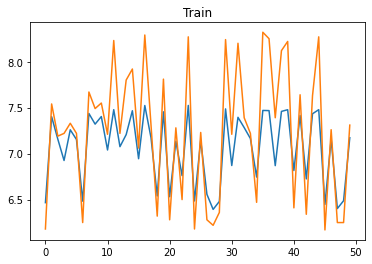

2/2 [==============================] - 0s 5ms/step


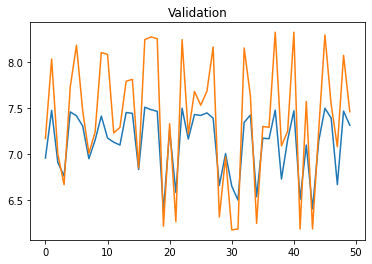

3/3 [==============================] - 0s 5ms/step


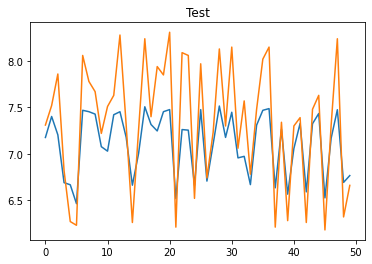

3/3 [==============================] - 0s 4ms/step


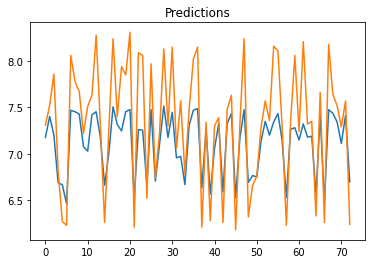

In [30]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [31]:
auto_rnn_mse

0.18090367791843678

# Moving Average with Encoder

### CNN

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 44627.0742 - root_mean_squared_error: 211.2512 

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 23s 1s/step - loss: 44453.6953 - root_mean_squared_error: 210.8405 - val_loss: 1614.1643 - val_root_mean_squared_error: 40.1767
Epoch 2/50
8/8 [==============================] - 0s 38ms/step - loss: 37297.1953 - root_mean_squared_error: 193.1248 - val_loss: 5581.4536 - val_root_mean_squared_error: 74.7091
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 36551.7852 - root_mean_squared_error: 191.1852

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 36733.5234 - root_mean_squared_error: 191.6599 - val_loss: 1539.0625 - val_root_mean_squared_error: 39.2309
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 28187.4492 - root_mean_squared_error: 167.8912

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 28426.3379 - root_mean_squared_error: 168.6011 - val_loss: 425.5830 - val_root_mean_squared_error: 20.6297
Epoch 5/50
5/8 [=================>............] - ETA: 0s - loss: 26891.5039 - root_mean_squared_error: 163.9863

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 20s 3s/step - loss: 26941.9668 - root_mean_squared_error: 164.1401 - val_loss: 261.9976 - val_root_mean_squared_error: 16.1863
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 22639.4980 - root_mean_squared_error: 150.4643

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 22639.4980 - root_mean_squared_error: 150.4643 - val_loss: 123.7307 - val_root_mean_squared_error: 11.1234
Epoch 7/50
8/8 [==============================] - 0s 58ms/step - loss: 19034.3398 - root_mean_squared_error: 137.9650 - val_loss: 531.8969 - val_root_mean_squared_error: 23.0629
Epoch 8/50
8/8 [==============================] - 0s 47ms/step - loss: 19050.1816 - root_mean_squared_error: 138.0224 - val_loss: 655.1039 - val_root_mean_squared_error: 25.5950
Epoch 9/50
8/8 [==============================] - 0s 32ms/step - loss: 19877.6523 - root_mean_squared_error: 140.9881 - val_loss: 2099.3943 - val_root_mean_squared_error: 45.8191
Epoch 10/50
8/8 [==============================] - 0s 38ms/step - loss: 15926.3652 - root_mean_squared_error: 126.1997 - val_loss: 4335.2119 - val_root_mean_squared_error: 65.8423
Epoch 11/50
8/8 [==============================] - 0s 49ms/step - loss: 11180.8770 - root_mean_squared_error: 105.7397 -

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 889ms/step - loss: 6033.1992 - root_mean_squared_error: 77.6737 - val_loss: 83.5841 - val_root_mean_squared_error: 9.1424
Epoch 19/50
6/8 [=====================>........] - ETA: 0s - loss: 3901.5247 - root_mean_squared_error: 62.4622

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 4073.4285 - root_mean_squared_error: 63.8234 - val_loss: 4.9945 - val_root_mean_squared_error: 2.2348
Epoch 20/50
8/8 [==============================] - 0s 22ms/step - loss: 3984.0789 - root_mean_squared_error: 63.1196 - val_loss: 25.3547 - val_root_mean_squared_error: 5.0353
Epoch 21/50
8/8 [==============================] - 0s 18ms/step - loss: 3077.8389 - root_mean_squared_error: 55.4783 - val_loss: 87.1561 - val_root_mean_squared_error: 9.3357
Epoch 22/50
8/8 [==============================] - 0s 41ms/step - loss: 3292.4807 - root_mean_squared_error: 57.3801 - val_loss: 163.9862 - val_root_mean_squared_error: 12.8057
Epoch 23/50
8/8 [==============================] - 0s 40ms/step - loss: 2669.2019 - root_mean_squared_error: 51.6643 - val_loss: 302.6302 - val_root_mean_squared_error: 17.3963
Epoch 24/50
8/8 [==============================] - 0s 54ms/step - loss: 3516.0708 - root_mean_squared_error: 59.2965 - val_loss: 252.725

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 14s 2s/step - loss: 1634.7544 - root_mean_squared_error: 40.4321 - val_loss: 4.4440 - val_root_mean_squared_error: 2.1081
Epoch 31/50
8/8 [==============================] - 1s 74ms/step - loss: 1367.6779 - root_mean_squared_error: 36.9821 - val_loss: 6.1950 - val_root_mean_squared_error: 2.4890
Epoch 32/50
8/8 [==============================] - 0s 64ms/step - loss: 1227.1053 - root_mean_squared_error: 35.0301 - val_loss: 18.6904 - val_root_mean_squared_error: 4.3232
Epoch 33/50
8/8 [==============================] - 0s 23ms/step - loss: 1120.5632 - root_mean_squared_error: 33.4748 - val_loss: 38.0361 - val_root_mean_squared_error: 6.1673
Epoch 34/50
8/8 [==============================] - 0s 42ms/step - loss: 874.1646 - root_mean_squared_error: 29.5663 - val_loss: 53.3966 - val_root_mean_squared_error: 7.3073
Epoch 35/50
8/8 [==============================] - 0s 41ms/step - loss: 1348.2537 - root_mean_squared_error: 36.7186 - val_loss: 54.7247 - va

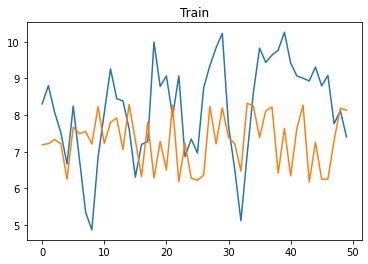

2/2 [==============================] - 1s 4ms/step


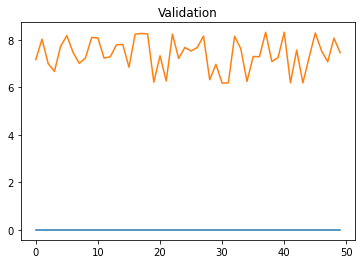

3/3 [==============================] - 0s 6ms/step


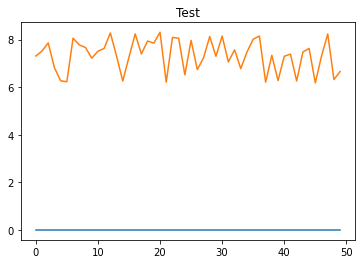

3/3 [==============================] - 0s 5ms/step


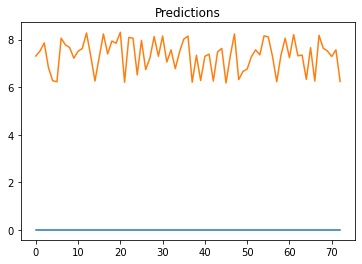

In [32]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_autoencoder_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [33]:
mavg_auto_cnn_mse

54.26371349760006

### RNN

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 63.4510 - root_mean_squared_error: 7.9656 INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 20s 2s/step - loss: 62.0372 - root_mean_squared_error: 7.8764 - val_loss: 57.5009 - val_root_mean_squared_error: 7.5829
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 57.7191 - root_mean_squared_error: 7.5973INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 57.7191 - root_mean_squared_error: 7.5973 - val_loss: 53.0169 - val_root_mean_squared_error: 7.2813
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 52.8557 - root_mean_squared_error: 7.2702INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 52.5425 - root_mean_squared_error: 7.2486 - val_loss: 48.8158 - val_root_mean_squared_error: 6.9868
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 49.5498 - root_mean_squared_error: 7.0392INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 49.3677 - root_mean_squared_error: 7.0262 - val_loss: 44.8787 - val_root_mean_squared_error: 6.6992
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 44.4101 - root_mean_squared_error: 6.6641INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 44.4101 - root_mean_squared_error: 6.6641 - val_loss: 41.2291 - val_root_mean_squared_error: 6.4210
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 41.2220 - root_mean_squared_error: 6.4204INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 41.2220 - root_mean_squared_error: 6.4204 - val_loss: 37.8634 - val_root_mean_squared_error: 6.1533
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 38.0116 - root_mean_squared_error: 6.1654INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 37.7603 - root_mean_squared_error: 6.1449 - val_loss: 34.7101 - val_root_mean_squared_error: 5.8915
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 34.9498 - root_mean_squared_error: 5.9118INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 34.8085 - root_mean_squared_error: 5.8999 - val_loss: 31.7771 - val_root_mean_squared_error: 5.6371
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 31.5357 - root_mean_squared_error: 5.6157INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 26s 4s/step - loss: 31.5722 - root_mean_squared_error: 5.6189 - val_loss: 29.0702 - val_root_mean_squared_error: 5.3917
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 29.6852 - root_mean_squared_error: 5.4484INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 29.6785 - root_mean_squared_error: 5.4478 - val_loss: 26.5505 - val_root_mean_squared_error: 5.1527
Epoch 11/50
5/8 [=================>............] - ETA: 0s - loss: 26.9770 - root_mean_squared_error: 5.1939INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 26.4028 - root_mean_squared_error: 5.1384 - val_loss: 24.2416 - val_root_mean_squared_error: 4.9236
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 23.7891 - root_mean_squared_error: 4.8774INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 23.9244 - root_mean_squared_error: 4.8913 - val_loss: 22.1020 - val_root_mean_squared_error: 4.7013
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 22.0702 - root_mean_squared_error: 4.6979INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 22.0702 - root_mean_squared_error: 4.6979 - val_loss: 20.1091 - val_root_mean_squared_error: 4.4843
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 19.9664 - root_mean_squared_error: 4.4684INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 19.9664 - root_mean_squared_error: 4.4684 - val_loss: 18.2720 - val_root_mean_squared_error: 4.2746
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 18.6845 - root_mean_squared_error: 4.3226INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 18.6907 - root_mean_squared_error: 4.3233 - val_loss: 16.5784 - val_root_mean_squared_error: 4.0717
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 16.8603 - root_mean_squared_error: 4.1061INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 5s 681ms/step - loss: 16.8603 - root_mean_squared_error: 4.1061 - val_loss: 14.9779 - val_root_mean_squared_error: 3.8701
Epoch 17/50
5/8 [=================>............] - ETA: 0s - loss: 15.3736 - root_mean_squared_error: 3.9209INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 963ms/step - loss: 15.5485 - root_mean_squared_error: 3.9432 - val_loss: 13.5005 - val_root_mean_squared_error: 3.6743
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 14.0420 - root_mean_squared_error: 3.7473INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 14.0420 - root_mean_squared_error: 3.7473 - val_loss: 12.1165 - val_root_mean_squared_error: 3.4809
Epoch 19/50
4/8 [==============>...............] - ETA: 0s - loss: 13.1064 - root_mean_squared_error: 3.6203INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 12.7023 - root_mean_squared_error: 3.5640 - val_loss: 10.8372 - val_root_mean_squared_error: 3.2920
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 11.4912 - root_mean_squared_error: 3.3899INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 19s 3s/step - loss: 11.4912 - root_mean_squared_error: 3.3899 - val_loss: 9.6664 - val_root_mean_squared_error: 3.1091
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 10.0963 - root_mean_squared_error: 3.1775INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 9.9964 - root_mean_squared_error: 3.1617 - val_loss: 8.5882 - val_root_mean_squared_error: 2.9306
Epoch 22/50
5/8 [=================>............] - ETA: 0s - loss: 9.0594 - root_mean_squared_error: 3.0099INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 8.9873 - root_mean_squared_error: 2.9979 - val_loss: 7.6045 - val_root_mean_squared_error: 2.7576
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 8.1988 - root_mean_squared_error: 2.8634INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 8.1988 - root_mean_squared_error: 2.8634 - val_loss: 6.6913 - val_root_mean_squared_error: 2.5867
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 7.2292 - root_mean_squared_error: 2.6887INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 7.0316 - root_mean_squared_error: 2.6517 - val_loss: 5.8705 - val_root_mean_squared_error: 2.4229
Epoch 25/50
5/8 [=================>............] - ETA: 0s - loss: 6.4668 - root_mean_squared_error: 2.5430INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 6.1741 - root_mean_squared_error: 2.4848 - val_loss: 5.1278 - val_root_mean_squared_error: 2.2645
Epoch 26/50
5/8 [=================>............] - ETA: 0s - loss: 5.5862 - root_mean_squared_error: 2.3635INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 5.4802 - root_mean_squared_error: 2.3410 - val_loss: 4.4853 - val_root_mean_squared_error: 2.1178
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 4.4546 - root_mean_squared_error: 2.1106INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 21s 3s/step - loss: 4.4954 - root_mean_squared_error: 2.1202 - val_loss: 3.9209 - val_root_mean_squared_error: 1.9801
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 4.5804 - root_mean_squared_error: 2.1402INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 18s 3s/step - loss: 4.6078 - root_mean_squared_error: 2.1466 - val_loss: 3.4199 - val_root_mean_squared_error: 1.8493
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 3.8963 - root_mean_squared_error: 1.9739INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 3.9391 - root_mean_squared_error: 1.9847 - val_loss: 2.9812 - val_root_mean_squared_error: 1.7266
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 3.7888 - root_mean_squared_error: 1.9465INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 3.8132 - root_mean_squared_error: 1.9527 - val_loss: 2.6027 - val_root_mean_squared_error: 1.6133
Epoch 31/50
5/8 [=================>............] - ETA: 0s - loss: 3.3282 - root_mean_squared_error: 1.8243INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 3.1434 - root_mean_squared_error: 1.7730 - val_loss: 2.2762 - val_root_mean_squared_error: 1.5087
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2.6926 - root_mean_squared_error: 1.6409INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2.6926 - root_mean_squared_error: 1.6409 - val_loss: 2.0083 - val_root_mean_squared_error: 1.4171
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 2.6444 - root_mean_squared_error: 1.6262INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2.7461 - root_mean_squared_error: 1.6571 - val_loss: 1.7931 - val_root_mean_squared_error: 1.3391
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 2.5428 - root_mean_squared_error: 1.5946INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2.5280 - root_mean_squared_error: 1.5900 - val_loss: 1.6031 - val_root_mean_squared_error: 1.2661
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 2.4750 - root_mean_squared_error: 1.5732INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 21s 3s/step - loss: 2.3451 - root_mean_squared_error: 1.5314 - val_loss: 1.4378 - val_root_mean_squared_error: 1.1991
Epoch 36/50
5/8 [=================>............] - ETA: 0s - loss: 1.9739 - root_mean_squared_error: 1.4049INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 969ms/step - loss: 1.9539 - root_mean_squared_error: 1.3978 - val_loss: 1.3009 - val_root_mean_squared_error: 1.1406
Epoch 37/50
6/8 [=====================>........] - ETA: 0s - loss: 1.8524 - root_mean_squared_error: 1.3610INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.9325 - root_mean_squared_error: 1.3901 - val_loss: 1.1741 - val_root_mean_squared_error: 1.0835
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 2.1241 - root_mean_squared_error: 1.4574INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2.0898 - root_mean_squared_error: 1.4456 - val_loss: 1.0601 - val_root_mean_squared_error: 1.0296
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 1.8217 - root_mean_squared_error: 1.3497INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.8134 - root_mean_squared_error: 1.3466 - val_loss: 0.9659 - val_root_mean_squared_error: 0.9828
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 1.6325 - root_mean_squared_error: 1.2777INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1.6325 - root_mean_squared_error: 1.2777 - val_loss: 0.8852 - val_root_mean_squared_error: 0.9408
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 1.8496 - root_mean_squared_error: 1.3600INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 25s 4s/step - loss: 1.8206 - root_mean_squared_error: 1.3493 - val_loss: 0.8196 - val_root_mean_squared_error: 0.9053
Epoch 42/50
5/8 [=================>............] - ETA: 0s - loss: 1.3354 - root_mean_squared_error: 1.1556INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.5054 - root_mean_squared_error: 1.2269 - val_loss: 0.7648 - val_root_mean_squared_error: 0.8745
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 1.8928 - root_mean_squared_error: 1.3758INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 1.8928 - root_mean_squared_error: 1.3758 - val_loss: 0.7192 - val_root_mean_squared_error: 0.8481
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 2.2777 - root_mean_squared_error: 1.5092INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 1.6796 - root_mean_squared_error: 1.2960 - val_loss: 0.6740 - val_root_mean_squared_error: 0.8210
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 1.4866 - root_mean_squared_error: 1.2193INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 1.4866 - root_mean_squared_error: 1.2193 - val_loss: 0.6342 - val_root_mean_squared_error: 0.7964
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 1.3837 - root_mean_squared_error: 1.1763INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1.3837 - root_mean_squared_error: 1.1763 - val_loss: 0.5996 - val_root_mean_squared_error: 0.7743
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 1.4307 - root_mean_squared_error: 1.1961INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1.4132 - root_mean_squared_error: 1.1888 - val_loss: 0.5746 - val_root_mean_squared_error: 0.7580
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 1.3320 - root_mean_squared_error: 1.1541INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 22s 3s/step - loss: 1.3332 - root_mean_squared_error: 1.1546 - val_loss: 0.5561 - val_root_mean_squared_error: 0.7457
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 1.4321 - root_mean_squared_error: 1.1967INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1.4970 - root_mean_squared_error: 1.2235 - val_loss: 0.5405 - val_root_mean_squared_error: 0.7352
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 1.4979 - root_mean_squared_error: 1.2239INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 13ms/step


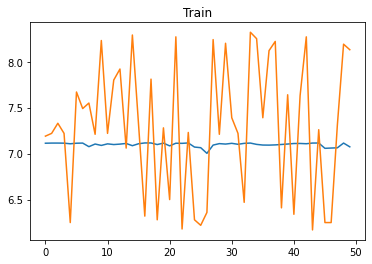

2/2 [==============================] - 1s 5ms/step


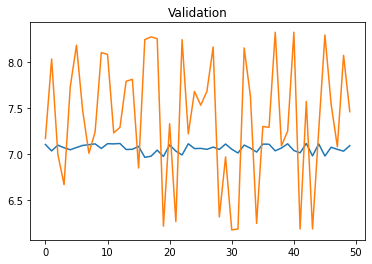

3/3 [==============================] - 0s 11ms/step


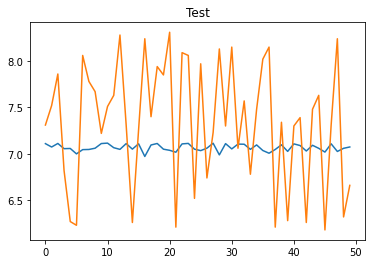

3/3 [==============================] - 0s 4ms/step


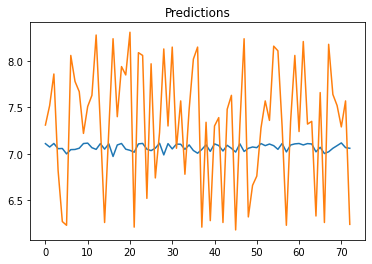

In [34]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs,moving_avg_data,target, x_val, y_val)


plot_train("mavg_auto_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [35]:
mavg_auto_rnn_mse

0.4894614963839779

### GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 55.6710 - root_mean_squared_error: 7.4613

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 62s 6s/step - loss: 55.6710 - root_mean_squared_error: 7.4613 - val_loss: 52.7179 - val_root_mean_squared_error: 7.2607
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 52.7222 - root_mean_squared_error: 7.2610

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 52.7222 - root_mean_squared_error: 7.2610 - val_loss: 49.8411 - val_root_mean_squared_error: 7.0598
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 50.0427 - root_mean_squared_error: 7.0741

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 49.8957 - root_mean_squared_error: 7.0637 - val_loss: 47.0601 - val_root_mean_squared_error: 6.8600
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 46.8944 - root_mean_squared_error: 6.8479

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 46.8944 - root_mean_squared_error: 6.8479 - val_loss: 44.3647 - val_root_mean_squared_error: 6.6607
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 44.4066 - root_mean_squared_error: 6.6638

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 44.3192 - root_mean_squared_error: 6.6573 - val_loss: 41.7489 - val_root_mean_squared_error: 6.4613
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 41.6289 - root_mean_squared_error: 6.4520

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 41.5413 - root_mean_squared_error: 6.4453 - val_loss: 39.2688 - val_root_mean_squared_error: 6.2665
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 39.1610 - root_mean_squared_error: 6.2579

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 39.2020 - root_mean_squared_error: 6.2611 - val_loss: 36.9173 - val_root_mean_squared_error: 6.0760
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 36.7531 - root_mean_squared_error: 6.0624

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 44s 6s/step - loss: 36.6587 - root_mean_squared_error: 6.0546 - val_loss: 34.6404 - val_root_mean_squared_error: 5.8856
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 34.3125 - root_mean_squared_error: 5.8577

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 34.3125 - root_mean_squared_error: 5.8577 - val_loss: 32.4386 - val_root_mean_squared_error: 5.6955
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 32.7878 - root_mean_squared_error: 5.7261

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 32.7568 - root_mean_squared_error: 5.7234 - val_loss: 30.2712 - val_root_mean_squared_error: 5.5019
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 30.2357 - root_mean_squared_error: 5.4987

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 47s 7s/step - loss: 30.2010 - root_mean_squared_error: 5.4955 - val_loss: 28.1711 - val_root_mean_squared_error: 5.3076
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 28.0913 - root_mean_squared_error: 5.3001

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 28.0450 - root_mean_squared_error: 5.2958 - val_loss: 26.1207 - val_root_mean_squared_error: 5.1108
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 26.0433 - root_mean_squared_error: 5.1033

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 26.0075 - root_mean_squared_error: 5.0998 - val_loss: 24.1648 - val_root_mean_squared_error: 4.9158
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 23.8842 - root_mean_squared_error: 4.8872

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 23.8842 - root_mean_squared_error: 4.8872 - val_loss: 22.2881 - val_root_mean_squared_error: 4.7210
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 22.2868 - root_mean_squared_error: 4.7209

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 22.2203 - root_mean_squared_error: 4.7138 - val_loss: 20.4808 - val_root_mean_squared_error: 4.5256
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 20.2056 - root_mean_squared_error: 4.4951

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 20.2056 - root_mean_squared_error: 4.4951 - val_loss: 18.7340 - val_root_mean_squared_error: 4.3283
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 18.5996 - root_mean_squared_error: 4.3127

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 18.5877 - root_mean_squared_error: 4.3113 - val_loss: 17.0680 - val_root_mean_squared_error: 4.1313
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 16.5202 - root_mean_squared_error: 4.0645

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 16.4977 - root_mean_squared_error: 4.0617 - val_loss: 15.4658 - val_root_mean_squared_error: 3.9327
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 15.5564 - root_mean_squared_error: 3.9442

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 15.4909 - root_mean_squared_error: 3.9359 - val_loss: 13.9330 - val_root_mean_squared_error: 3.7327
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 14.1511 - root_mean_squared_error: 3.7618

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 13.9795 - root_mean_squared_error: 3.7389 - val_loss: 12.4869 - val_root_mean_squared_error: 3.5337
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 12.3320 - root_mean_squared_error: 3.5117

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 12.3310 - root_mean_squared_error: 3.5116 - val_loss: 11.1420 - val_root_mean_squared_error: 3.3380
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 11.1342 - root_mean_squared_error: 3.3368

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 10.9772 - root_mean_squared_error: 3.3132 - val_loss: 9.8886 - val_root_mean_squared_error: 3.1446
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 9.6799 - root_mean_squared_error: 3.1113

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 9.6403 - root_mean_squared_error: 3.1049 - val_loss: 8.7366 - val_root_mean_squared_error: 2.9558
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 8.6895 - root_mean_squared_error: 2.9478

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 8.6895 - root_mean_squared_error: 2.9478 - val_loss: 7.6848 - val_root_mean_squared_error: 2.7721
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 7.3845 - root_mean_squared_error: 2.7175

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 7.3820 - root_mean_squared_error: 2.7170 - val_loss: 6.7343 - val_root_mean_squared_error: 2.5951
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 6.7375 - root_mean_squared_error: 2.5957

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 6.7356 - root_mean_squared_error: 2.5953 - val_loss: 5.8769 - val_root_mean_squared_error: 2.4242
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 6.0795 - root_mean_squared_error: 2.4657

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 6.0670 - root_mean_squared_error: 2.4631 - val_loss: 5.1126 - val_root_mean_squared_error: 2.2611
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 5.3355 - root_mean_squared_error: 2.3099

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 5.2523 - root_mean_squared_error: 2.2918 - val_loss: 4.4350 - val_root_mean_squared_error: 2.1059
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 4.6944 - root_mean_squared_error: 2.1667

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 4.5595 - root_mean_squared_error: 2.1353 - val_loss: 3.8283 - val_root_mean_squared_error: 1.9566
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 3.8836 - root_mean_squared_error: 1.9707

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 3.8836 - root_mean_squared_error: 1.9707 - val_loss: 3.3124 - val_root_mean_squared_error: 1.8200
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 3.3898 - root_mean_squared_error: 1.8411

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 3.3987 - root_mean_squared_error: 1.8435 - val_loss: 2.8724 - val_root_mean_squared_error: 1.6948
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 3.1478 - root_mean_squared_error: 1.7742

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 3.1478 - root_mean_squared_error: 1.7742 - val_loss: 2.4854 - val_root_mean_squared_error: 1.5765
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 2.9079 - root_mean_squared_error: 1.7053

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 2.9099 - root_mean_squared_error: 1.7058 - val_loss: 2.1525 - val_root_mean_squared_error: 1.4672
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 2.5807 - root_mean_squared_error: 1.6065

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2.5139 - root_mean_squared_error: 1.5855 - val_loss: 1.8769 - val_root_mean_squared_error: 1.3700
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 2.1277 - root_mean_squared_error: 1.4587

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 39s 6s/step - loss: 2.1468 - root_mean_squared_error: 1.4652 - val_loss: 1.6497 - val_root_mean_squared_error: 1.2844
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 1.8831 - root_mean_squared_error: 1.3723

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 1.8831 - root_mean_squared_error: 1.3723 - val_loss: 1.4546 - val_root_mean_squared_error: 1.2061
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 1.7474 - root_mean_squared_error: 1.3219

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 1.7289 - root_mean_squared_error: 1.3149 - val_loss: 1.2833 - val_root_mean_squared_error: 1.1328
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 1.6406 - root_mean_squared_error: 1.2808

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 1.6263 - root_mean_squared_error: 1.2753 - val_loss: 1.1431 - val_root_mean_squared_error: 1.0692
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 1.5103 - root_mean_squared_error: 1.2289

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 1.5103 - root_mean_squared_error: 1.2289 - val_loss: 1.0227 - val_root_mean_squared_error: 1.0113
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 1.2896 - root_mean_squared_error: 1.1356

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 1.2896 - root_mean_squared_error: 1.1356 - val_loss: 0.9201 - val_root_mean_squared_error: 0.9592
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 1.2523 - root_mean_squared_error: 1.1190

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 1.2523 - root_mean_squared_error: 1.1190 - val_loss: 0.8292 - val_root_mean_squared_error: 0.9106
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 1.1666 - root_mean_squared_error: 1.0801

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 1.1487 - root_mean_squared_error: 1.0718 - val_loss: 0.7535 - val_root_mean_squared_error: 0.8680
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 1.0654 - root_mean_squared_error: 1.0322

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 47s 7s/step - loss: 1.0654 - root_mean_squared_error: 1.0322 - val_loss: 0.6912 - val_root_mean_squared_error: 0.8314
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 0.9786 - root_mean_squared_error: 0.9893

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 0.9748 - root_mean_squared_error: 0.9873 - val_loss: 0.6417 - val_root_mean_squared_error: 0.8011
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 1.0109 - root_mean_squared_error: 1.0054

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 1.0121 - root_mean_squared_error: 1.0060 - val_loss: 0.5972 - val_root_mean_squared_error: 0.7728
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 0.8867 - root_mean_squared_error: 0.9416

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 0.8867 - root_mean_squared_error: 0.9416 - val_loss: 0.5595 - val_root_mean_squared_error: 0.7480
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 0.8405 - root_mean_squared_error: 0.9168

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 0.8405 - root_mean_squared_error: 0.9168 - val_loss: 0.5284 - val_root_mean_squared_error: 0.7269
Epoch 48/50
6/8 [=====================>........] - ETA: 0s - loss: 0.7936 - root_mean_squared_error: 0.8908

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 0.8078 - root_mean_squared_error: 0.8988 - val_loss: 0.5038 - val_root_mean_squared_error: 0.7098
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 0.7404 - root_mean_squared_error: 0.8605

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 44s 6s/step - loss: 0.7404 - root_mean_squared_error: 0.8605 - val_loss: 0.4847 - val_root_mean_squared_error: 0.6962
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 0.7626 - root_mean_squared_error: 0.8733

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 5s 15ms/step


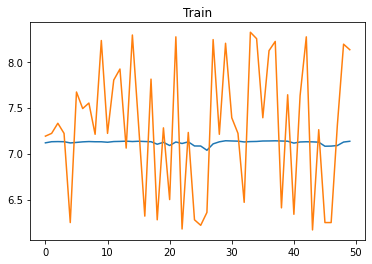

2/2 [==============================] - 3s 10ms/step


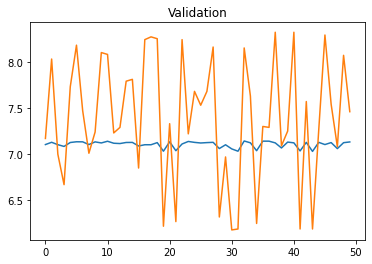

3/3 [==============================] - 0s 6ms/step


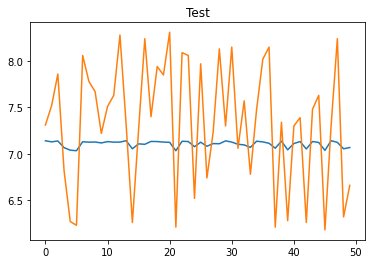

3/3 [==============================] - 0s 6ms/step


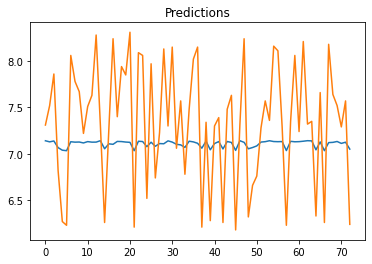

In [36]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_auto_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [37]:
mavg_auto_gru_mse

0.44079968788648155

### LSTM

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 59.7727 - root_mean_squared_error: 7.7313

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 73s 6s/step - loss: 59.7898 - root_mean_squared_error: 7.7324 - val_loss: 57.6521 - val_root_mean_squared_error: 7.5929
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 58.0451 - root_mean_squared_error: 7.6187

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 58.0254 - root_mean_squared_error: 7.6174 - val_loss: 56.1271 - val_root_mean_squared_error: 7.4918
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 57.3488 - root_mean_squared_error: 7.5729

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 56.8282 - root_mean_squared_error: 7.5384 - val_loss: 54.3826 - val_root_mean_squared_error: 7.3745
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 54.6626 - root_mean_squared_error: 7.3934

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 54.6660 - root_mean_squared_error: 7.3936 - val_loss: 52.6127 - val_root_mean_squared_error: 7.2535
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 52.9423 - root_mean_squared_error: 7.2761

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 52.9608 - root_mean_squared_error: 7.2774 - val_loss: 50.9233 - val_root_mean_squared_error: 7.1361
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 51.3320 - root_mean_squared_error: 7.1646

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 51.2131 - root_mean_squared_error: 7.1563 - val_loss: 49.3298 - val_root_mean_squared_error: 7.0235
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 49.7759 - root_mean_squared_error: 7.0552

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 49.7759 - root_mean_squared_error: 7.0552 - val_loss: 47.8388 - val_root_mean_squared_error: 6.9166
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 48.0607 - root_mean_squared_error: 6.9326

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 48.0215 - root_mean_squared_error: 6.9298 - val_loss: 46.3359 - val_root_mean_squared_error: 6.8070
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 46.9605 - root_mean_squared_error: 6.8528

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 46.8631 - root_mean_squared_error: 6.8457 - val_loss: 44.7386 - val_root_mean_squared_error: 6.6887
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 45.1422 - root_mean_squared_error: 6.7188

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 45.0283 - root_mean_squared_error: 6.7103 - val_loss: 43.0230 - val_root_mean_squared_error: 6.5592
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 43.0387 - root_mean_squared_error: 6.5604

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 42.9404 - root_mean_squared_error: 6.5529 - val_loss: 41.0119 - val_root_mean_squared_error: 6.4041
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 41.3993 - root_mean_squared_error: 6.4342

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 41.3993 - root_mean_squared_error: 6.4342 - val_loss: 39.5630 - val_root_mean_squared_error: 6.2899
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 39.5420 - root_mean_squared_error: 6.2882

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 39.5420 - root_mean_squared_error: 6.2882 - val_loss: 38.1802 - val_root_mean_squared_error: 6.1790
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 38.3208 - root_mean_squared_error: 6.1904

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 38.3038 - root_mean_squared_error: 6.1890 - val_loss: 36.8078 - val_root_mean_squared_error: 6.0669
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 37.2312 - root_mean_squared_error: 6.1017

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 55s 8s/step - loss: 37.2406 - root_mean_squared_error: 6.1025 - val_loss: 35.3696 - val_root_mean_squared_error: 5.9472
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 35.1014 - root_mean_squared_error: 5.9246

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 35.1014 - root_mean_squared_error: 5.9246 - val_loss: 33.9760 - val_root_mean_squared_error: 5.8289
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 34.1219 - root_mean_squared_error: 5.8414

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 34.2305 - root_mean_squared_error: 5.8507 - val_loss: 32.5233 - val_root_mean_squared_error: 5.7029
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 32.7275 - root_mean_squared_error: 5.7208

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 54s 8s/step - loss: 32.7035 - root_mean_squared_error: 5.7187 - val_loss: 31.0118 - val_root_mean_squared_error: 5.5688
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 31.3938 - root_mean_squared_error: 5.6030

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 31.3938 - root_mean_squared_error: 5.6030 - val_loss: 29.4545 - val_root_mean_squared_error: 5.4272
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 29.2253 - root_mean_squared_error: 5.4060

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 29.1980 - root_mean_squared_error: 5.4035 - val_loss: 27.6279 - val_root_mean_squared_error: 5.2562
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 27.5755 - root_mean_squared_error: 5.2512

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 48s 7s/step - loss: 27.5234 - root_mean_squared_error: 5.2463 - val_loss: 25.8776 - val_root_mean_squared_error: 5.0870
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 26.0927 - root_mean_squared_error: 5.1081

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 48s 7s/step - loss: 25.8453 - root_mean_squared_error: 5.0838 - val_loss: 24.1764 - val_root_mean_squared_error: 4.9170
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 24.2828 - root_mean_squared_error: 4.9278

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 24.3101 - root_mean_squared_error: 4.9305 - val_loss: 22.5472 - val_root_mean_squared_error: 4.7484
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 22.8633 - root_mean_squared_error: 4.7816

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 60s 9s/step - loss: 22.8696 - root_mean_squared_error: 4.7822 - val_loss: 20.9520 - val_root_mean_squared_error: 4.5773
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 20.8747 - root_mean_squared_error: 4.5689

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 20.8747 - root_mean_squared_error: 4.5689 - val_loss: 19.3854 - val_root_mean_squared_error: 4.4029
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 19.8050 - root_mean_squared_error: 4.4503

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 49s 7s/step - loss: 19.8050 - root_mean_squared_error: 4.4503 - val_loss: 17.8588 - val_root_mean_squared_error: 4.2260
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 17.9438 - root_mean_squared_error: 4.2360

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 17.9128 - root_mean_squared_error: 4.2324 - val_loss: 16.3159 - val_root_mean_squared_error: 4.0393
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 16.1635 - root_mean_squared_error: 4.0204

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 58s 8s/step - loss: 16.1635 - root_mean_squared_error: 4.0204 - val_loss: 14.8045 - val_root_mean_squared_error: 3.8477
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 14.9502 - root_mean_squared_error: 3.8666

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 14.9571 - root_mean_squared_error: 3.8674 - val_loss: 13.4106 - val_root_mean_squared_error: 3.6621
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 13.6808 - root_mean_squared_error: 3.6988

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 47s 7s/step - loss: 13.6784 - root_mean_squared_error: 3.6984 - val_loss: 12.1123 - val_root_mean_squared_error: 3.4803
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 12.5758 - root_mean_squared_error: 3.5462

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 12.5758 - root_mean_squared_error: 3.5462 - val_loss: 10.8451 - val_root_mean_squared_error: 3.2932
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 10.8422 - root_mean_squared_error: 3.2928

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 47s 7s/step - loss: 10.8422 - root_mean_squared_error: 3.2928 - val_loss: 9.6595 - val_root_mean_squared_error: 3.1080
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 9.7841 - root_mean_squared_error: 3.1280 

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 60s 8s/step - loss: 9.7841 - root_mean_squared_error: 3.1280 - val_loss: 8.5901 - val_root_mean_squared_error: 2.9309
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 8.9553 - root_mean_squared_error: 2.9925

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 8.9327 - root_mean_squared_error: 2.9888 - val_loss: 7.6590 - val_root_mean_squared_error: 2.7675
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 7.9725 - root_mean_squared_error: 2.8236

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 7.9725 - root_mean_squared_error: 2.8236 - val_loss: 6.8322 - val_root_mean_squared_error: 2.6139
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 6.8470 - root_mean_squared_error: 2.6167

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 64s 9s/step - loss: 6.7510 - root_mean_squared_error: 2.5983 - val_loss: 6.0885 - val_root_mean_squared_error: 2.4675
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 6.2881 - root_mean_squared_error: 2.5076

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 32s 4s/step - loss: 6.2881 - root_mean_squared_error: 2.5076 - val_loss: 5.4209 - val_root_mean_squared_error: 2.3283
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 5.7348 - root_mean_squared_error: 2.3947

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 45s 6s/step - loss: 5.7865 - root_mean_squared_error: 2.4055 - val_loss: 4.8056 - val_root_mean_squared_error: 2.1922
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 5.0300 - root_mean_squared_error: 2.2428

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 50s 7s/step - loss: 5.0300 - root_mean_squared_error: 2.2428 - val_loss: 4.2497 - val_root_mean_squared_error: 2.0615
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 4.5343 - root_mean_squared_error: 2.1294

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 4.5343 - root_mean_squared_error: 2.1294 - val_loss: 3.7560 - val_root_mean_squared_error: 1.9380
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 4.6968 - root_mean_squared_error: 2.1672

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 45s 6s/step - loss: 4.6559 - root_mean_squared_error: 2.1578 - val_loss: 3.3156 - val_root_mean_squared_error: 1.8209
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 3.6571 - root_mean_squared_error: 1.9123

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 59s 8s/step - loss: 3.6571 - root_mean_squared_error: 1.9123 - val_loss: 2.9283 - val_root_mean_squared_error: 1.7112
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 3.3136 - root_mean_squared_error: 1.8203

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 3.3436 - root_mean_squared_error: 1.8286 - val_loss: 2.5384 - val_root_mean_squared_error: 1.5932
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 3.0201 - root_mean_squared_error: 1.7378

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 3.0201 - root_mean_squared_error: 1.7378 - val_loss: 2.1346 - val_root_mean_squared_error: 1.4610
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2.3571 - root_mean_squared_error: 1.5353

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 46s 6s/step - loss: 2.3571 - root_mean_squared_error: 1.5353 - val_loss: 1.8657 - val_root_mean_squared_error: 1.3659
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 2.6551 - root_mean_squared_error: 1.6294

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 2.5253 - root_mean_squared_error: 1.5891 - val_loss: 1.6287 - val_root_mean_squared_error: 1.2762
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2.0913 - root_mean_squared_error: 1.4461

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 45s 6s/step - loss: 2.0913 - root_mean_squared_error: 1.4461 - val_loss: 1.3945 - val_root_mean_squared_error: 1.1809
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 1.9740 - root_mean_squared_error: 1.4050

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 50s 7s/step - loss: 1.9722 - root_mean_squared_error: 1.4043 - val_loss: 1.2271 - val_root_mean_squared_error: 1.1077
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 1.8186 - root_mean_squared_error: 1.3485

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 43s 6s/step - loss: 1.8186 - root_mean_squared_error: 1.3485 - val_loss: 1.0841 - val_root_mean_squared_error: 1.0412
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 1.5726 - root_mean_squared_error: 1.2540

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 22s 13ms/step


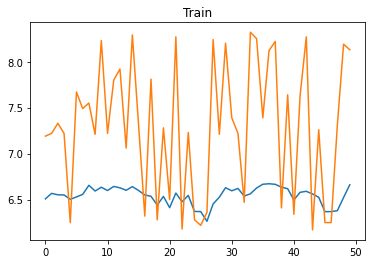

2/2 [==============================] - 3s 23ms/step


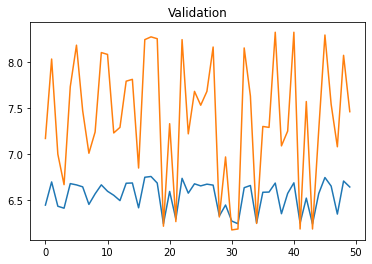

3/3 [==============================] - 0s 6ms/step


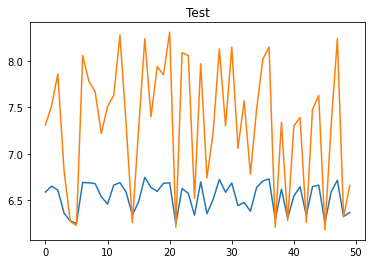

3/3 [==============================] - 0s 5ms/step


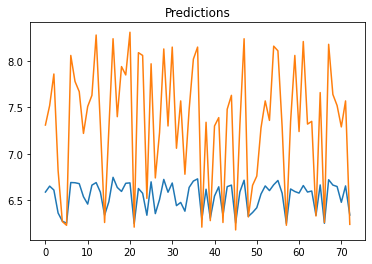

In [38]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
#model.add(Dense(8, 'relu'))
#model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs,moving_avg_data, target, x_val, y_val)


plot_train("mavg_auto_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [39]:
mavg_auto_lstm_mse

0.8945937426608845

# Hybrid

## General

### CNN LSTM

In [40]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 55.4976 - root_mean_squared_error: 7.4497

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 172s 19s/step - loss: 55.4976 - root_mean_squared_error: 7.4497 - val_loss: 51.8852 - val_root_mean_squared_error: 7.2031
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 50.3276 - root_mean_squared_error: 7.0942

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 104s 14s/step - loss: 50.3276 - root_mean_squared_error: 7.0942 - val_loss: 45.2373 - val_root_mean_squared_error: 6.7259
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 44.4070 - root_mean_squared_error: 6.6639

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 104s 15s/step - loss: 44.4070 - root_mean_squared_error: 6.6639 - val_loss: 41.6454 - val_root_mean_squared_error: 6.4533
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 40.8356 - root_mean_squared_error: 6.3903

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 96s 14s/step - loss: 40.8356 - root_mean_squared_error: 6.3903 - val_loss: 38.3192 - val_root_mean_squared_error: 6.1902
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 38.0162 - root_mean_squared_error: 6.1657

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 126s 18s/step - loss: 38.0162 - root_mean_squared_error: 6.1657 - val_loss: 35.5052 - val_root_mean_squared_error: 5.9586
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 35.6133 - root_mean_squared_error: 5.9677

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 126s 18s/step - loss: 35.6133 - root_mean_squared_error: 5.9677 - val_loss: 33.7963 - val_root_mean_squared_error: 5.8135
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 33.8174 - root_mean_squared_error: 5.8153

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 102s 14s/step - loss: 33.8174 - root_mean_squared_error: 5.8153 - val_loss: 31.9599 - val_root_mean_squared_error: 5.6533
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 31.9661 - root_mean_squared_error: 5.6539

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 130s 18s/step - loss: 32.0052 - root_mean_squared_error: 5.6573 - val_loss: 30.3546 - val_root_mean_squared_error: 5.5095
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 30.3867 - root_mean_squared_error: 5.5124

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 111s 16s/step - loss: 30.3867 - root_mean_squared_error: 5.5124 - val_loss: 28.7944 - val_root_mean_squared_error: 5.3660
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 28.8171 - root_mean_squared_error: 5.3682

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 94s 13s/step - loss: 28.8171 - root_mean_squared_error: 5.3682 - val_loss: 27.2693 - val_root_mean_squared_error: 5.2220
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 27.2866 - root_mean_squared_error: 5.2237

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 133s 19s/step - loss: 27.2866 - root_mean_squared_error: 5.2237 - val_loss: 25.7853 - val_root_mean_squared_error: 5.0779
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 25.7952 - root_mean_squared_error: 5.0789

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 117s 17s/step - loss: 25.7952 - root_mean_squared_error: 5.0789 - val_loss: 24.3423 - val_root_mean_squared_error: 4.9338
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 24.3495 - root_mean_squared_error: 4.9345

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 125s 18s/step - loss: 24.3495 - root_mean_squared_error: 4.9345 - val_loss: 22.9359 - val_root_mean_squared_error: 4.7891
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 22.9445 - root_mean_squared_error: 4.7900

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 130s 19s/step - loss: 22.9413 - root_mean_squared_error: 4.7897 - val_loss: 21.5769 - val_root_mean_squared_error: 4.6451
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 21.5772 - root_mean_squared_error: 4.6451

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 103s 15s/step - loss: 21.5802 - root_mean_squared_error: 4.6455 - val_loss: 20.2614 - val_root_mean_squared_error: 4.5013
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 20.2728 - root_mean_squared_error: 4.5025

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 146s 20s/step - loss: 20.2728 - root_mean_squared_error: 4.5025 - val_loss: 18.9884 - val_root_mean_squared_error: 4.3576
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 18.9636 - root_mean_squared_error: 4.3547

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 102s 14s/step - loss: 18.9996 - root_mean_squared_error: 4.3589 - val_loss: 17.7523 - val_root_mean_squared_error: 4.2134
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 17.4844 - root_mean_squared_error: 4.1814

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 117s 16s/step - loss: 17.4844 - root_mean_squared_error: 4.1814 - val_loss: 15.7003 - val_root_mean_squared_error: 3.9624
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 15.7140 - root_mean_squared_error: 3.9641

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 110s 15s/step - loss: 15.7140 - root_mean_squared_error: 3.9641 - val_loss: 14.5962 - val_root_mean_squared_error: 3.8205
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 14.6149 - root_mean_squared_error: 3.8229

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 113s 16s/step - loss: 14.6149 - root_mean_squared_error: 3.8229 - val_loss: 13.5482 - val_root_mean_squared_error: 3.6808
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 13.5731 - root_mean_squared_error: 3.6842

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 116s 16s/step - loss: 13.5731 - root_mean_squared_error: 3.6842 - val_loss: 12.5703 - val_root_mean_squared_error: 3.5455
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 12.6001 - root_mean_squared_error: 3.5497

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 113s 16s/step - loss: 12.6001 - root_mean_squared_error: 3.5497 - val_loss: 11.6619 - val_root_mean_squared_error: 3.4150
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 11.7869 - root_mean_squared_error: 3.4332

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 100s 14s/step - loss: 11.7018 - root_mean_squared_error: 3.4208 - val_loss: 10.8205 - val_root_mean_squared_error: 3.2894
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 10.8665 - root_mean_squared_error: 3.2964

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 136s 19s/step - loss: 10.8665 - root_mean_squared_error: 3.2964 - val_loss: 10.0304 - val_root_mean_squared_error: 3.1671
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 10.0603 - root_mean_squared_error: 3.1718

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 132s 19s/step - loss: 10.0603 - root_mean_squared_error: 3.1718 - val_loss: 9.2721 - val_root_mean_squared_error: 3.0450
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 9.3369 - root_mean_squared_error: 3.0556

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 128s 18s/step - loss: 9.3369 - root_mean_squared_error: 3.0556 - val_loss: 8.6198 - val_root_mean_squared_error: 2.9360
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 8.6943 - root_mean_squared_error: 2.9486

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 131s 19s/step - loss: 8.6943 - root_mean_squared_error: 2.9486 - val_loss: 8.0123 - val_root_mean_squared_error: 2.8306
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 8.1165 - root_mean_squared_error: 2.8490

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 104s 15s/step - loss: 8.0926 - root_mean_squared_error: 2.8447 - val_loss: 7.4513 - val_root_mean_squared_error: 2.7297
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 7.5243 - root_mean_squared_error: 2.7431

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 132s 19s/step - loss: 7.5243 - root_mean_squared_error: 2.7431 - val_loss: 6.9136 - val_root_mean_squared_error: 2.6294
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 6.9913 - root_mean_squared_error: 2.6441

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 123s 17s/step - loss: 6.9913 - root_mean_squared_error: 2.6441 - val_loss: 6.4107 - val_root_mean_squared_error: 2.5319
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 6.4918 - root_mean_squared_error: 2.5479

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 113s 16s/step - loss: 6.4918 - root_mean_squared_error: 2.5479 - val_loss: 5.9446 - val_root_mean_squared_error: 2.4382
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 6.0274 - root_mean_squared_error: 2.4551

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 137s 19s/step - loss: 6.0274 - root_mean_squared_error: 2.4551 - val_loss: 5.5191 - val_root_mean_squared_error: 2.3493
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 5.6041 - root_mean_squared_error: 2.3673

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 136s 19s/step - loss: 5.6041 - root_mean_squared_error: 2.3673 - val_loss: 5.1240 - val_root_mean_squared_error: 2.2636
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 5.2099 - root_mean_squared_error: 2.2825

KeyboardInterrupt: 

In [ ]:
hybrid_cnn_lstm_mse

### RNN LSTM

In [ ]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(15,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_rnn_lstm_mse

### RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_rnn_gru_mse

### CNN GRU

In [ ]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_cnn_gru_mse

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_cnn_rnn_gru_mse

### LSTM RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_lstm_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_lstm_rnn_gru_mse

## Moving Average

### CNN LSTM

In [ ]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_lstm_mse

### RNN LSTM

In [ ]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(15,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_rnn_lstm_mse

### RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_rnn_gru_mse

### CNN GRU

In [ ]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_gru_mse

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_rnn_gru_mse

### RNN LSTM GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_hybrid_lstm_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_lstm_rnn_gru_mse

# MSE

In [ ]:
mse_list = [cnn_mse, rnn_mse, gru_mse, lstm_mse,
            mvg_cnn_mse, mvg_rnn_mse, mvg_gru_mse, mvg_lstm_mse,
            auto_cnn_mse, auto_rnn_mse, auto_gru_mse, auto_lstm_mse,
            mavg_auto_cnn_mse, mavg_auto_rnn_mse, mavg_auto_gru_mse, mavg_auto_lstm_mse,
            hybrid_cnn_lstm_mse, hybrid_lstm_rnn_gru_mse,hybrid_cnn_rnn_gru_mse,hybrid_cnn_gru_mse,
            hybrid_rnn_gru_mse,hybrid_rnn_lstm_mse,
            mavg_hybrid_cnn_lstm_mse, mavg_hybrid_lstm_rnn_gru_mse,mavg_hybrid_cnn_rnn_gru_mse,
            mavg_hybrid_cnn_gru_mse,mavg_hybrid_rnn_gru_mse,mavg_hybrid_rnn_lstm_mse]

model_n = ["cnn", "rnn", "gru", "lstm",
           "mvg_cnn", "mvg_rnn", "mvg_gru", "mvg_lstm",
           "auto_cnn", "auto_rnn", "auto_gru", "auto_lstm",
           "mvg_auto_cnn", "mvg_auto_rnn", "mvg_auto_gru", "mvg_auto_lstm",
           "hybrid_cnn_lstm", "hybrid_lstm_rnn_gru" ,"hybrid_cnn_rnn_gru","hybrid_cnn_gru",
           "hybrid_rnn_gru","hybrid_rnn_lstm",
           "mavg_hybrid_cnn_lstm", "mavg_hybrid_lstm_rnn_gru","mavg_hybrid_cnn_rnn_gru",
           "mavg_hybrid_cnn_gru","mavg_hybrid_rnn_gru","mavg_hybrid_rnn_lstm"
          ]

msedf = pd.DataFrame({
    "Model": model_n,
    "MSE": mse_list
})

rmse = np.sqrt(msedf.MSE)
msedf["RMSE"] = rmse

In [ ]:
msedf

In [ ]:
msedf.to_csv("msedf.csv", index= False)

In [ ]:
msedf.plot("Model", "RMSE", kind= "bar")

In [ ]:
np.save("x_train.npy", x_train)
np.save("y_train.npy", y_train)
np.save("x_test.npy", x_test)
np.save("y_test.npy", y_test)
np.save("x_val.npy", x_val)
np.save("y_val.npy", y_val)